## Data Wrangling, EDA and Feature Engineering

The main goal of this section is to clean the data by removing the outliers, duplicate entries and generate new features using various tools. 
<br>
In addition this section aims to find interesting patterns in the data and perform some descriptive and inferential statistics. 


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')


from datetime import date 
from datetime import datetime 
from datetime import timedelta 


import plotly.graph_objects as go
#!pip install --upgrade geopandas
#!pip install --upgrade pyshp
#!pip install --upgrade shapely
#!pip install --upgrade descartes
import plotly.figure_factory as ff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration: 


In [ ]:
# Covid-19 Cases and Deaths
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/us-counties.csv')
df['date']=pd.to_datetime(df['date'])
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985344 entries, 0 to 985343
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    985344 non-null  datetime64[ns]
 1   county  985344 non-null  object        
 2   state   985344 non-null  object        
 3   fips    976229 non-null  float64       
 4   cases   985344 non-null  int64         
 5   deaths  964165 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 45.1+ MB


In [ ]:
df_us=df.drop('fips',axis=1)
df_us.head()

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0


In [ ]:
# Data grouped by date
us=df_us.groupby('date',as_index=False).sum()
us['date']=pd.to_datetime(us['date'])
us.head()

,date,cases,deaths
0,2020-01-21,1,0.0
1,2020-01-22,1,0.0
2,2020-01-23,1,0.0
3,2020-01-24,2,0.0
4,2020-01-25,3,0.0


### Visualization of statewise Covid confirmed cases for 01-05-2021 

In [ ]:
df=df_us[df_us['date']=='2021-01-05'].groupby('state',as_index=False).sum()
df=df.sort_values(by='state', ignore_index=True)
df.head()


,state,cases,deaths
0,Alabama,379593,4886.0
1,Alaska,48302,209.0
2,Arizona,571676,9354.0
3,Arkansas,238888,3836.0
4,California,2511822,27486.0


In [ ]:
#Checking the territories of US in dataset and exclude them for visualization
len(df['state'].unique())

55

In [ ]:
# Non-US state 
print('index of Guam is: {}'.format(df[df['state']=='Guam'].index))
print('index of Northern Mariana Islands is: {}'.format(df[df['state']=='Northern Mariana Islands'].index))
print('index of Puerto Rico is: {}'.format(df[df['state']=='Puerto Rico'].index))
print('index of Virgin Islands is: {}'.format(df[df['state']=='Virgin Islands'].index))

index of Guam is: Int64Index([11], dtype='int64')
index of Northern Mariana Islands is: Int64Index([36], dtype='int64')
index of Puerto Rico is: Int64Index([41], dtype='int64')
index of Virgin Islands is: Int64Index([49], dtype='int64')


In [ ]:
#drop non-us state
df=df.drop(index=[49,41,36,11])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 54
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   51 non-null     object 
 1   cases   51 non-null     int64  
 2   deaths  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Code of US state for Choropleth map 
df['code']=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE','DC','FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [ ]:
#choropleth map for confirmed cases
fig = go.Figure(data=go.Choropleth(locations=df['code'],z = df['cases'], 
                                   locationmode = 'USA-states', colorscale = 'Reds',colorbar_title = "No. of Cases",))

fig.update_layout(
    title_text = 'Total no. of confirmed Covid cases by State as of 2021-01-05', geo_scope='usa', )

fig.show()

**Majority of confirmed cases corresponds to the California, Texas, Florida, New York and Illinois.**

In [ ]:
#choropleth map for deaths
fig = go.Figure(data=go.Choropleth(locations=df['code'], z = df['deaths'], 
    locationmode = 'USA-states', colorscale = 'Reds', colorbar_title = "No. of Deaths",))

fig.update_layout(
    title_text = 'Total no. of Covid Deaths by State as of 2021-01-05', geo_scope='usa',)

fig.show()

**Similar to the confirmed cases, majority of deaths corresponds to the New York, California, Texas, Florida and Illinois.**

### Top and bottom 10 states for confirmed cases and deaths

In [ ]:
df=df_us.drop('county',axis=1).groupby(by=['date','state'],as_index=False).sum()
df=df[df['date']=='2021-01-05']
df['cases in %']=100* df['cases']/sum(df['cases'])
df['deaths in %']=100* df['deaths']/sum(df['deaths'])

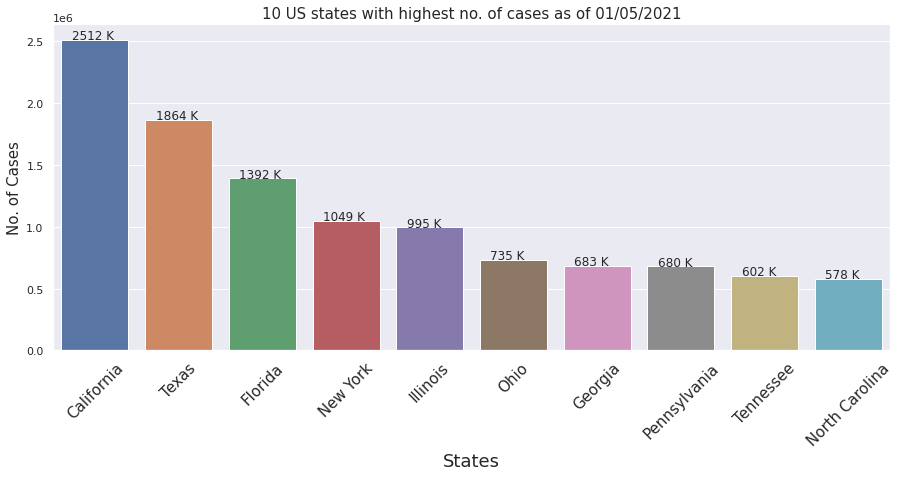

In [ ]:
sns.set()

plt.figure(figsize=(15,6))
ax=sns.barplot(x='state', y='cases', data=df.sort_values('cases', ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('States',fontsize=18)
_=plt.ylabel('No. of Cases', fontsize=15)

plt.title('10 US states with highest no. of cases as of 01/05/2021', fontsize=15)

for p in ax.patches:
        ax.annotate('{} K'.format(int(round(p.get_height()/1000))), (p.get_x()+0.125, p.get_height()+5000))

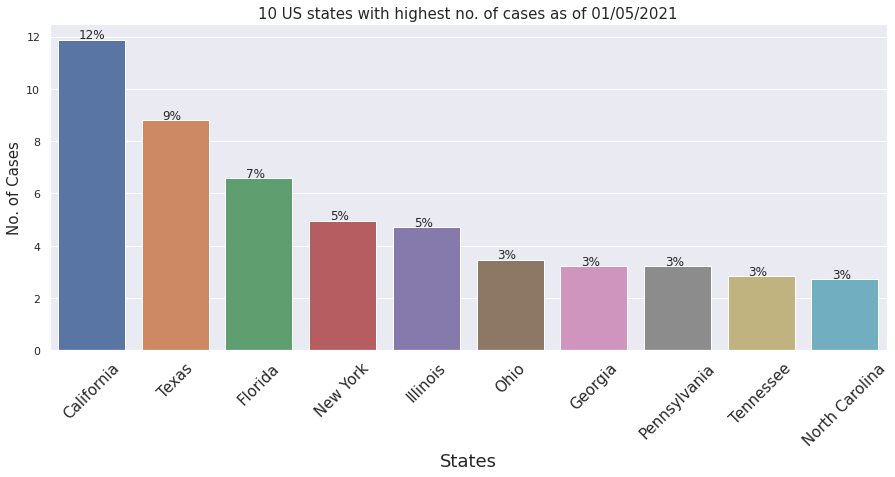

In [ ]:
sns.set()
top_10_cases=df.sort_values('cases', ascending=False).head(10)

plt.figure(figsize=(15,6))
ax=sns.barplot(x='state', y='cases in %', data=top_10_cases)
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('States',fontsize=18)
_=plt.ylabel('No. of Cases', fontsize=15)

plt.title('10 US states with highest no. of cases as of 01/05/2021', fontsize=15)

for p in ax.patches:
        ax.annotate('{}%'.format(int(round(p.get_height()))), (p.get_x()+0.25, p.get_height()+0.05))

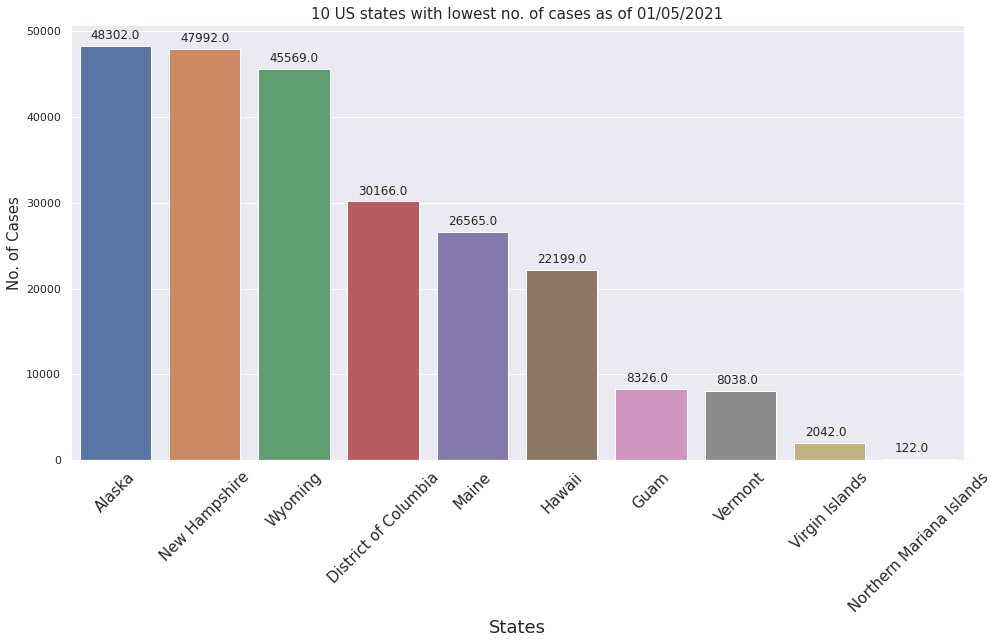

In [ ]:
sns.set()
plt.figure(figsize=(16,8))
ax=sns.barplot(x='state', y='cases', data=df.sort_values('cases', ascending=False).tail(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('States',fontsize=18)
_=plt.ylabel('No. of Cases', fontsize=15)

plt.title('10 US states with lowest no. of cases as of 01/05/2021', fontsize=15)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.125, p.get_height()+800))

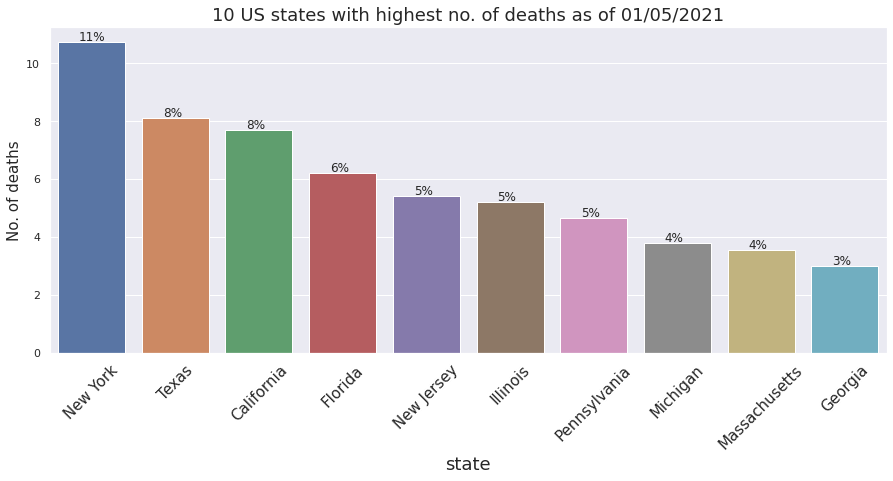

In [ ]:
sns.set()
plt.figure(figsize=(15,6))
ax=sns.barplot(x='state', y='deaths in %', data=df.sort_values('deaths', ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('state',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 US states with highest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}%'.format(int(round(p.get_height()))), (p.get_x()+0.25, p.get_height()+0.05))

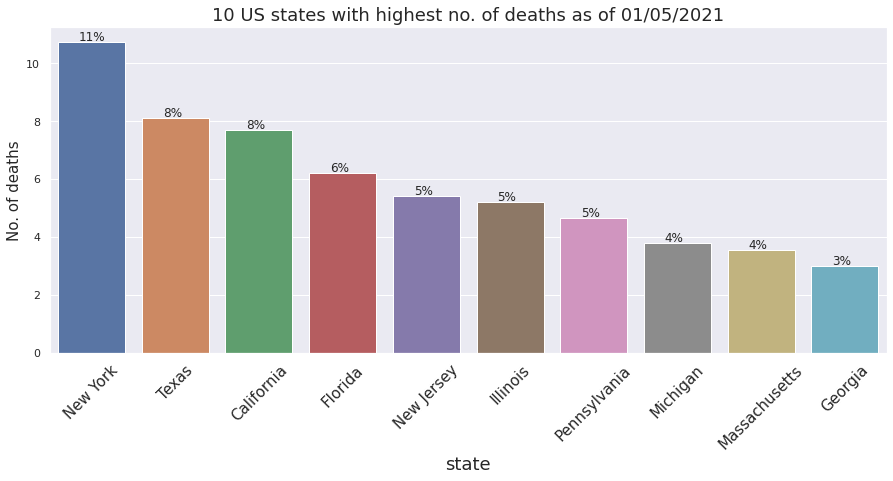

In [ ]:
sns.set()
plt.figure(figsize=(15,6))
ax=sns.barplot(x='state', y='deaths in %', data=df.sort_values('deaths', ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('state',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 US states with highest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}%'.format(int(round(p.get_height()))), (p.get_x()+0.25, p.get_height()+0.05))

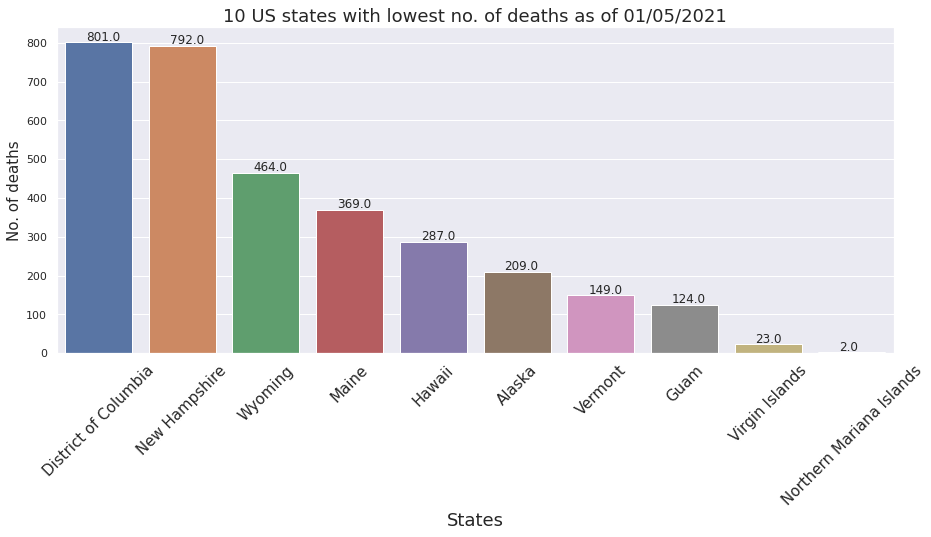

In [ ]:
sns.set()
plt.figure(figsize=(15,6))
ax=sns.barplot(x='state', y='deaths', data=df.sort_values('deaths', ascending=False).tail(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('States',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 US states with lowest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

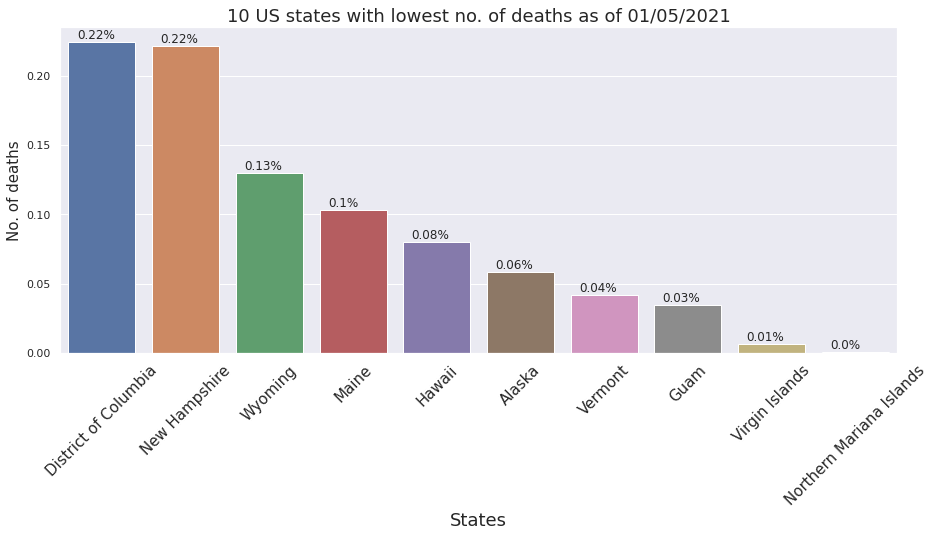

In [ ]:
sns.set()
plt.figure(figsize=(15,6))
ax=sns.barplot(x='state', y='deaths in %', data=df.sort_values('deaths', ascending=False).tail(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('States',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 US states with lowest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}%'.format(round(p.get_height(),2)), (p.get_x()+0.1, p.get_height()+0.0025))

### Visualization of daily Cases/Deaths

In [ ]:
#Extracting no. of cases and deaths of a single day and visualize for total USA
us=df.drop('fips',axis=1).groupby('date', as_index=False).sum()
us

,date,cases,deaths
0,2020-01-21,1,0.0
1,2020-01-22,1,0.0
2,2020-01-23,1,0.0
3,2020-01-24,2,0.0
4,2020-01-25,3,0.0
...,...,...,...
372,2021-01-27,25641317,429326.0
373,2021-01-28,25806567,433194.0
374,2021-01-29,25972231,436794.0
375,2021-01-30,26106136,439435.0


In [ ]:
#Extracting cases from cummulative cases
us.rename(columns={'cases':'cum_cases', 'deaths':'cum_deaths'}, inplace=True)
cases=us['cum_cases'].to_list()
deaths=us['cum_deaths'].to_list()
us['case']=[cases[0]]+[cases[i+1]-cases[i] for i in range(len(cases)-1)]
us['death']=[deaths[0]]+[deaths[i+1]-deaths[i] for i in range(len(deaths)-1)]
us.drop(['cum_cases',	'cum_deaths'], axis=1,inplace=True)
us['date'] = pd.to_datetime(us['date'])
us.head()

,date,case,death
0,2020-01-21,1,0.0
1,2020-01-22,0,0.0
2,2020-01-23,0,0.0
3,2020-01-24,1,0.0
4,2020-01-25,1,0.0


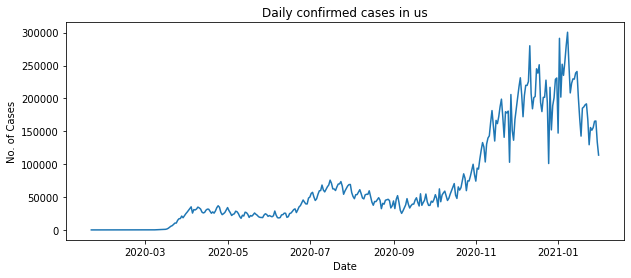

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='case', data=us)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('Daily confirmed cases in us')

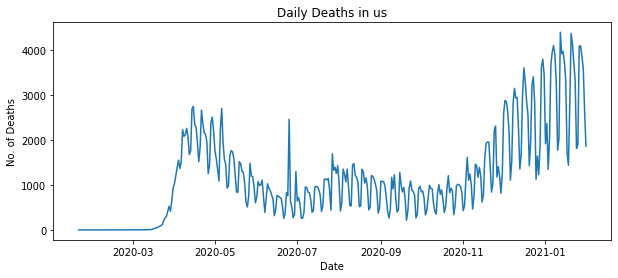

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='death', data=us)
_=plt.ylabel('No. of Deaths')
_=plt.xlabel('Date')
_=plt.title('Daily Deaths in us')

**There are many spikes in  the data, requires data smoothen by taking rolling average.**

**Cases and Deaths of Illinois state will be analyzed in this project.**

## Single state analysis: Illinois

In [ ]:
df_il=df_us[df_us['state']=='Illinois'].drop('state', axis=1)
df_il.head()

,date,county,cases,deaths
3,2020-01-24,Cook,1,0.0
6,2020-01-25,Cook,1,0.0
11,2020-01-26,Cook,1,0.0
16,2020-01-27,Cook,1,0.0
21,2020-01-28,Cook,1,0.0


### Visualization of Countywise data for Illinois state as of 01/05/2021

In [ ]:
# loading data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3/us-counties.csv')
df['date']=pd.to_datetime(df['date'])
il=df[(df['date']=='2021-01-05')&(df['state']=='Illinois')]
il.head()

,date,county,state,fips,cases,deaths
898321,2021-01-05,Adams,Illinois,17001.0,6942,84.0
898322,2021-01-05,Alexander,Illinois,17003.0,349,7.0
898323,2021-01-05,Bond,Illinois,17005.0,1589,17.0
898324,2021-01-05,Boone,Illinois,17007.0,5206,73.0
898325,2021-01-05,Brown,Illinois,17009.0,467,11.0


In [ ]:
len(il['county'].unique())

102

In [ ]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

cases = il['cases'].to_list()
fips=il['fips'].to_list()

colorscale = [
    'rgb(255, 229, 204)',
    'rgb(255,153,153)',
    'rgb(255, 102, 102)',
    'rgb(255,51,51)',
    'rgb(255,0,0)',
    'rgb(153,0, 0)'
]

fig = ff.create_choropleth(
    fips=fips, values=cases, scope=['Illinois'],
    binning_endpoints=[500,1000, 10000, 50000, 100000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='No. of Confirmed Cases', title='No. of confirmed Covid 19 cases in IL counties on 01/05/2021 '
)
fig.layout.template = None
fig.show()

### Top and bottom 10 counties for confirmed cases and deaths

In [ ]:
# Cases and Deaths in a single day 
df=df_il[df_il['date']=='2021-01-05']
df['cases in %']=100* df['cases']/sum(df['cases'])
df['deaths in %']=100* df['deaths']/sum(df['deaths'])
df.head()

,date,county,cases,deaths,cases in %,deaths in %
898321,2021-01-05,Adams,6942,84.0,0.698031,0.452367
898322,2021-01-05,Alexander,349,7.0,0.035093,0.037697
898323,2021-01-05,Bond,1589,17.0,0.159777,0.091550
898324,2021-01-05,Boone,5206,73.0,0.523473,0.393128
898325,2021-01-05,Brown,467,11.0,0.046958,0.059239


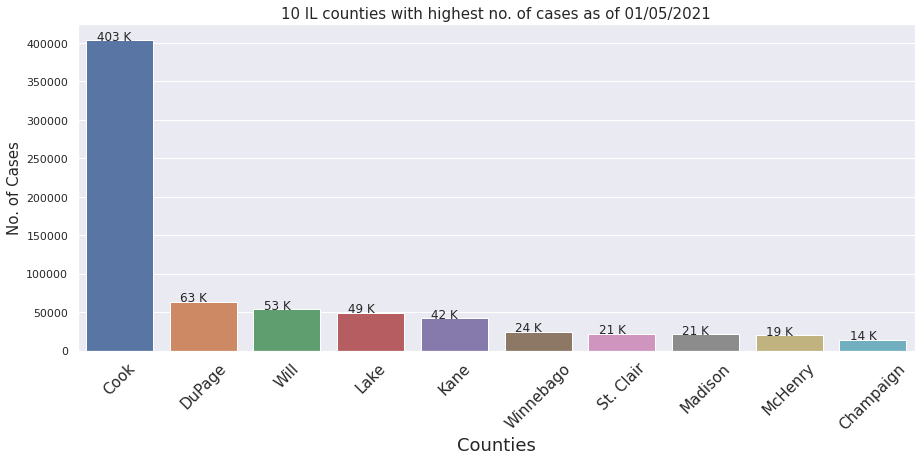

In [ ]:
sns.set()

plt.figure(figsize=(15,6))
ax=sns.barplot(x='county', y='cases', data=df.sort_values(by='cases',ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('Counties',fontsize=18)
_=plt.ylabel('No. of Cases', fontsize=15)

plt.title('10 IL counties with highest no. of cases as of 01/05/2021', fontsize=15)

for p in ax.patches:
        ax.annotate('{} K'.format(int(p.get_height()/1000)), (p.get_x()+0.125, p.get_height()+5))

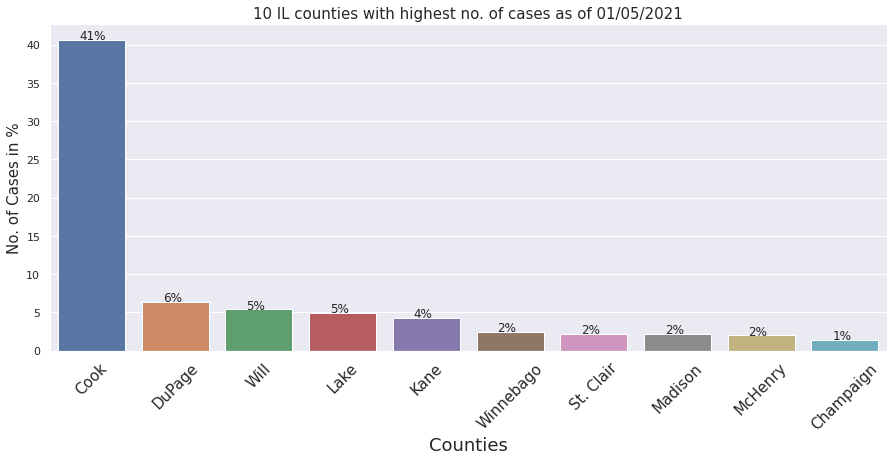

In [ ]:
sns.set()

plt.figure(figsize=(15,6))
ax=sns.barplot(x='county', y='cases in %', data=df.sort_values(by='cases',ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('Counties',fontsize=18)
_=plt.ylabel('No. of Cases in %', fontsize=15)

plt.title('10 IL counties with highest no. of cases as of 01/05/2021', fontsize=15)

for p in ax.patches:
        ax.annotate('{}%'.format(int(round(p.get_height()))), (p.get_x()+0.25, p.get_height()+0.05))

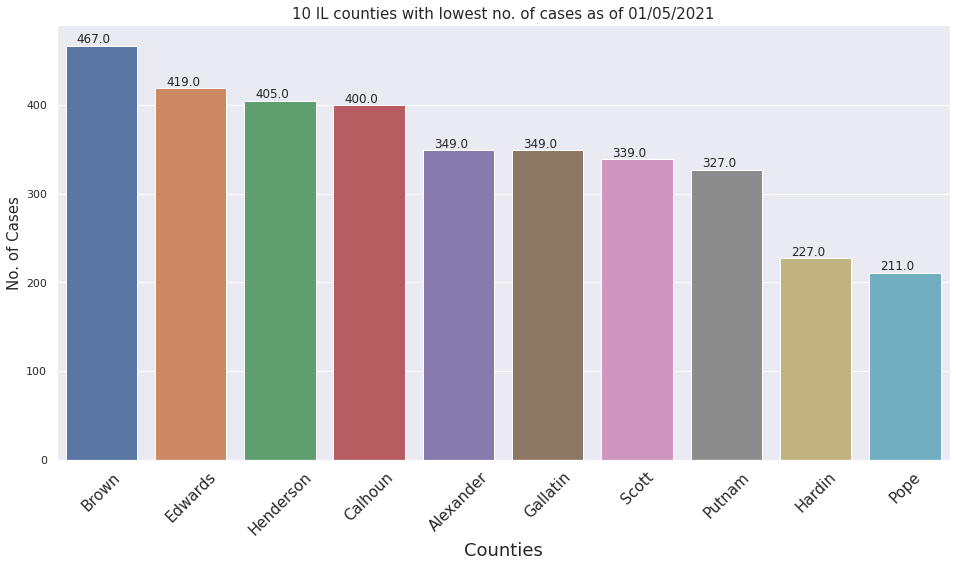

In [ ]:
sns.set()
plt.figure(figsize=(16,8))
ax=sns.barplot(x='county', y='cases', data=df.sort_values(by='cases', ascending=False).tail(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('Counties',fontsize=18)
_=plt.ylabel('No. of Cases', fontsize=15)

plt.title('10 IL counties with lowest no. of cases as of 01/05/2021', fontsize=15)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.125, p.get_height()+3))

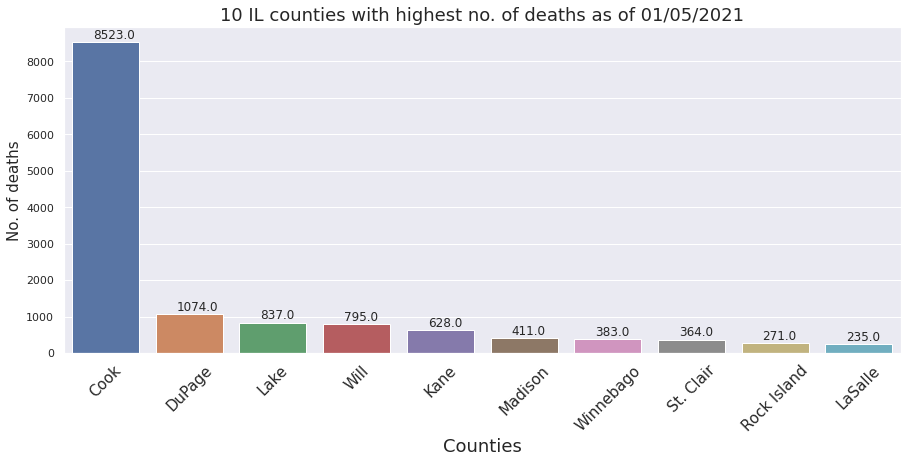

In [ ]:
sns.set()

plt.figure(figsize=(15,6))
ax=sns.barplot(x='county', y='deaths', data=df.sort_values(by='deaths',ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('Counties',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 IL counties with highest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+100))

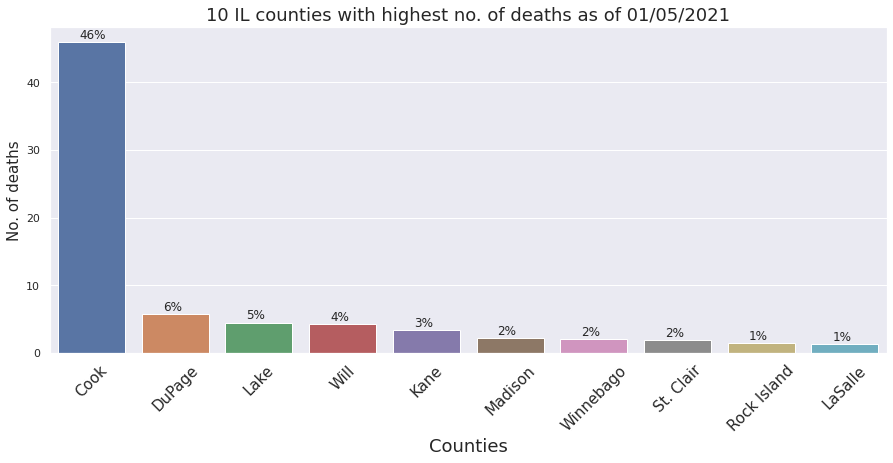

In [ ]:
sns.set()

plt.figure(figsize=(15,6))
ax=sns.barplot(x='county', y='deaths in %', data=df.sort_values(by='deaths',ascending=False).head(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('Counties',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 IL counties with highest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}%'.format(int(round(p.get_height()))), (p.get_x()+0.25, p.get_height()+0.5))

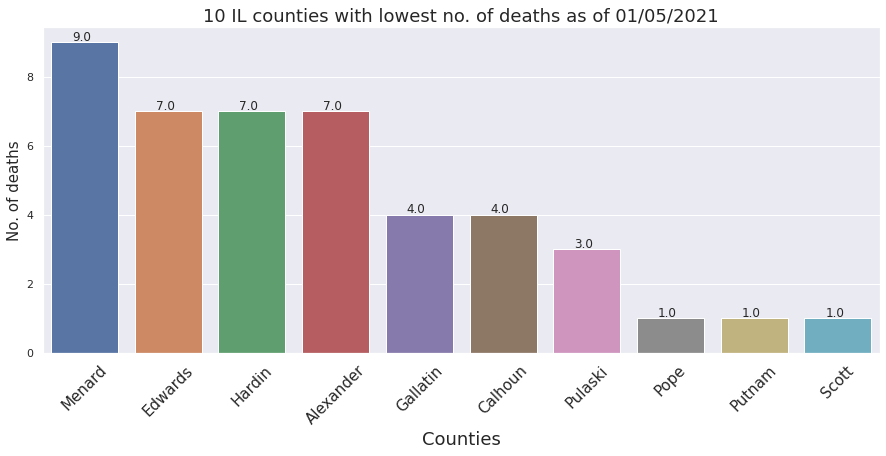

In [ ]:
sns.set()

plt.figure(figsize=(15,6))
ax=sns.barplot(x='county', y='deaths', data=df.sort_values(by='deaths', ascending=False).tail(10))
_=plt.xticks(rotation=45, fontsize=15)
_=plt.xlabel('Counties',fontsize=18)
_=plt.ylabel('No. of deaths', fontsize=15)

plt.title('10 IL counties with lowest no. of deaths as of 01/05/2021', fontsize=18)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.0625))

## Feature Engineering and Additional EDA

### Adding forecast data to the dataset

In [ ]:
#series of date
sdate = date(2021,2,1)   # start date
edate = date(2021,2,15)   # end date
date=pd.date_range(sdate,edate-timedelta(days=1),freq='d')
forecast=pd.DataFrame(date, columns=['date'])
forecast[['county', 'cases', 'deaths']]=np.nan
forecast['county']='Cook' # Finally cook county will be analyzed in detail
forecast

,date,county,cases,deaths
0,2021-02-01,Cook,NaN,NaN
1,2021-02-02,Cook,NaN,NaN
2,2021-02-03,Cook,NaN,NaN
3,2021-02-04,Cook,NaN,NaN
4,2021-02-05,Cook,NaN,NaN
5,2021-02-06,Cook,NaN,NaN
6,2021-02-07,Cook,NaN,NaN
7,2021-02-08,Cook,NaN,NaN
8,2021-02-09,Cook,NaN,NaN
9,2021-02-10,Cook,NaN,NaN


In [ ]:
#Merge forecast with df_il
df_il=pd.concat([df_il,forecast])
df_il

,date,county,cases,deaths
3,2020-01-24,Cook,1.0,0.0
6,2020-01-25,Cook,1.0,0.0
11,2020-01-26,Cook,1.0,0.0
16,2020-01-27,Cook,1.0,0.0
21,2020-01-28,Cook,1.0,0.0
...,...,...,...,...
9,2021-02-10,Cook,NaN,NaN
10,2021-02-11,Cook,NaN,NaN
11,2021-02-12,Cook,NaN,NaN
12,2021-02-13,Cook,NaN,NaN


### Additional data related to Covid-19

#### Holidays

In [ ]:
df_public_holidays=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/public holidays.csv')
df_public_holidays['date']=pd.to_datetime(df_public_holidays['date'])
df_public_holidays

,2020 federal holidays/celebrations,date
0,New Year’s Day,2020-01-01
1,Martin Luther King Jr Day,2020-01-20
2,President’s Day,2020-02-17
3,Easter,2020-04-12
4,Memorial Day,2020-05-25
5,Independence Day,2020-07-04
6,Labor Day,2020-09-07
7,Columbus Day,2020-10-12
8,Halloween,2020-10-31
9,Veterans' Day,2020-11-11


In [ ]:
public_holidays_dates=df_public_holidays['date'].values
public_holidays_dates

array(['2020-01-01T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-04-12T00:00:00.000000000',
       '2020-05-25T00:00:00.000000000', '2020-07-04T00:00:00.000000000',
       '2020-09-07T00:00:00.000000000', '2020-10-12T00:00:00.000000000',
       '2020-10-31T00:00:00.000000000', '2020-11-11T00:00:00.000000000',
       '2020-11-26T00:00:00.000000000', '2020-12-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_public_holidays.set_index('2020 federal holidays/celebrations').T.to_dict('list')

{'Christmas Day': [Timestamp('2020-12-25 00:00:00')],
 'Columbus Day': [Timestamp('2020-10-12 00:00:00')],
 'Easter': [Timestamp('2020-04-12 00:00:00')],
 'Halloween': [Timestamp('2020-10-31 00:00:00')],
 'Independence Day': [Timestamp('2020-07-04 00:00:00')],
 'Labor Day': [Timestamp('2020-09-07 00:00:00')],
 'Martin Luther King Jr Day': [Timestamp('2020-01-20 00:00:00')],
 'Memorial Day': [Timestamp('2020-05-25 00:00:00')],
 'New Year’s Day': [Timestamp('2020-01-01 00:00:00')],
 'President’s Day': [Timestamp('2020-02-17 00:00:00')],
 'Thanksgiving': [Timestamp('2020-11-26 00:00:00')],
 "Veterans' Day": [Timestamp('2020-11-11 00:00:00')]}

In [ ]:
# merging public holidays to df_il
df_il=df_il.merge(df_public_holidays, how='left',on='date')
df_il.rename(columns={'2020 federal holidays/celebrations':'public_holiday'},inplace=True)
df_il

,date,county,cases,deaths,public_holiday
0,2020-01-24,Cook,1.0,0.0,NaN
1,2020-01-25,Cook,1.0,0.0,NaN
2,2020-01-26,Cook,1.0,0.0,NaN
3,2020-01-27,Cook,1.0,0.0,NaN
4,2020-01-28,Cook,1.0,0.0,NaN
...,...,...,...,...,...
31410,2021-02-10,Cook,NaN,NaN,NaN
31411,2021-02-11,Cook,NaN,NaN,NaN
31412,2021-02-12,Cook,NaN,NaN,NaN
31413,2021-02-13,Cook,NaN,NaN,NaN


In [ ]:
df_il['public_holiday'].unique()

array([nan, 'President’s Day', 'Easter', 'Memorial Day',
       'Independence Day', 'Labor Day', 'Columbus Day', 'Halloween',
       "Veterans' Day", 'Thanksgiving', 'Christmas Day'], dtype=object)

In [ ]:
# Filling Nan by No
df_il['public_holiday']=df_il['public_holiday'].fillna('No')
df_il['public_holiday'].unique()

array(['No', 'President’s Day', 'Easter', 'Memorial Day',
       'Independence Day', 'Labor Day', 'Columbus Day', 'Halloween',
       "Veterans' Day", 'Thanksgiving', 'Christmas Day'], dtype=object)

### Visualization of daily cases to explore the effect of holidays in case surge

In [ ]:
df_il.head()

,date,county,cases,deaths,public_holiday
0,2020-01-24,Cook,1.0,0.0,No
1,2020-01-25,Cook,1.0,0.0,No
2,2020-01-26,Cook,1.0,0.0,No
3,2020-01-27,Cook,1.0,0.0,No
4,2020-01-28,Cook,1.0,0.0,No


In [ ]:
#Extracting no. of cases and deaths of a single day
il=df_us[df_us['state']=='Illinois'].drop('state', axis=1)
il=df_il.groupby('date', as_index=False).sum()
il['date']=pd.to_datetime(il['date'])
il=il.merge(df_public_holidays, how='left',on='date')
il.rename(columns={'2020 federal holidays/celebrations':'public_holiday'}, inplace=True)
il['public_holiday']=il['public_holiday'].fillna('No')

il.rename(columns={'cases':'cum_cases', 'deaths':'cum_deaths'}, inplace=True)
cases=il['cum_cases'].to_list()
deaths=il['cum_deaths'].to_list()
il['case']=[cases[0]]+[cases[i+1]-cases[i] for i in range(len(cases)-1)]
il['death']=[deaths[0]]+[deaths[i+1]-deaths[i] for i in range(len(deaths)-1)]

il.drop(['cum_cases',	'cum_deaths'], axis=1,inplace=True)
il.head(10)

,date,public_holiday,case,death
0,2020-01-24,No,1.0,0.0
1,2020-01-25,No,0.0,0.0
2,2020-01-26,No,0.0,0.0
3,2020-01-27,No,0.0,0.0
4,2020-01-28,No,0.0,0.0
5,2020-01-29,No,0.0,0.0
6,2020-01-30,No,1.0,0.0
7,2020-01-31,No,0.0,0.0
8,2020-02-01,No,0.0,0.0
9,2020-02-02,No,0.0,0.0


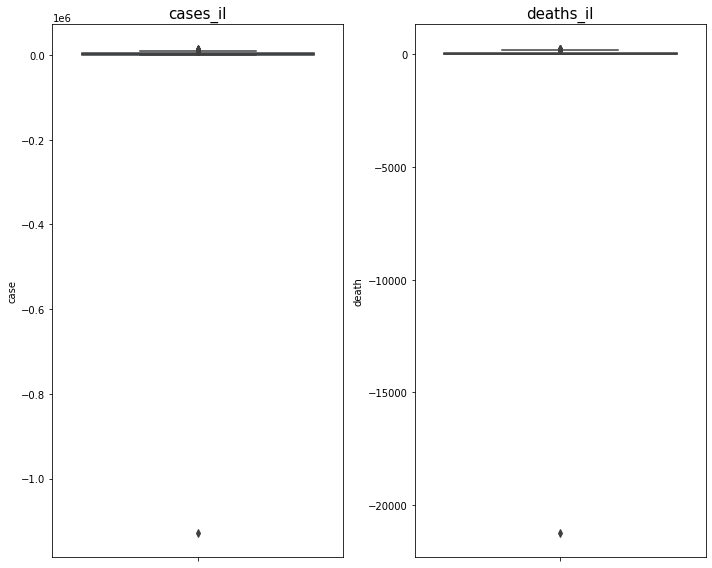

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='case',data=il, ax=ax1)
sns.boxplot(y='death',data=il, ax=ax2)
ax1.set_title('cases_il', fontsize=15)
ax2.set_title('deaths_il', fontsize=15)
fig.tight_layout()

Let's drop the outlier.

In [ ]:
il[il['case']<-1000000]

,date,public_holiday,case,death
374,2021-02-01,No,-1128750.0,-21242.0


In [ ]:
il.drop(index=374,inplace=True)

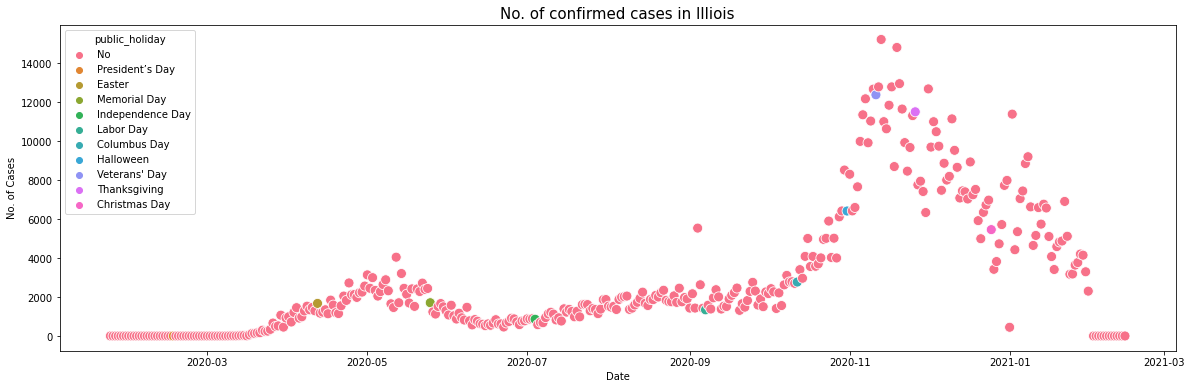

In [ ]:
#Visualization of confirmed cases and public holidays
il['date'] = pd.to_datetime(il['date'])
_=plt.figure(figsize=(20,6))
_=sns.scatterplot(x='date',y='case', data=il, hue='public_holiday', s=100)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('No. of confirmed cases in Illiois', fontsize=15)

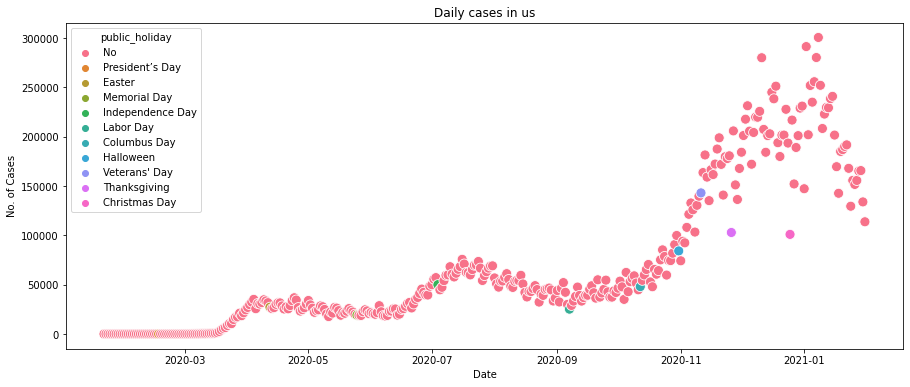

In [ ]:
#Extracting no. of cases and deaths of a single day and visualize for total USA
us=df_us.groupby('date', as_index=False).sum()
us=us.merge(df_public_holidays, how='left',on='date')
us.rename(columns={'2020 federal holidays/celebrations':'public_holiday'}, inplace=True)
us['public_holiday']=us['public_holiday'].fillna('No')

#Extracting cases from cummulative cases
us.rename(columns={'cases':'cum_cases', 'deaths':'cum_deaths'}, inplace=True)
cases=us['cum_cases'].to_list()
deaths=us['cum_deaths'].to_list()
us['case']=[cases[0]]+[cases[i+1]-cases[i] for i in range(len(cases)-1)]
us['death']=[deaths[0]]+[deaths[i+1]-deaths[i] for i in range(len(deaths)-1)]
us.drop(['cum_cases',	'cum_deaths'], axis=1,inplace=True)

us['date'] = pd.to_datetime(us['date'])

#visualization
_=plt.figure(figsize=(15,6))
_=sns.scatterplot(x='date',y='case', data=us, hue='public_holiday', s=100)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('Daily cases in us')

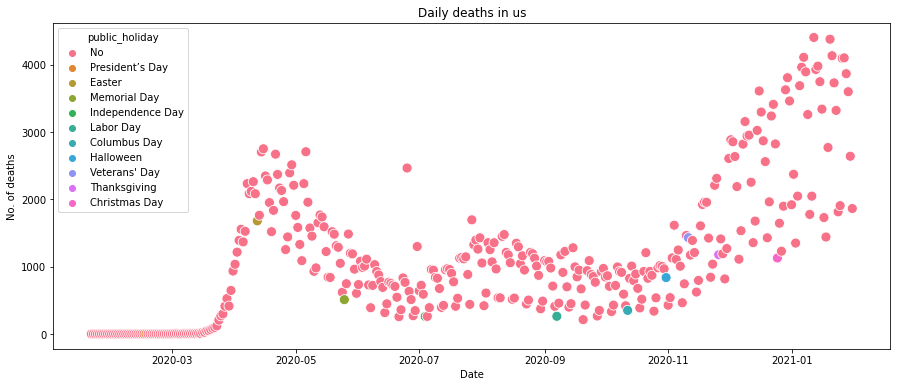

In [ ]:
#visualization
_=plt.figure(figsize=(15,6))
_=sns.scatterplot(x='date',y='death', data=us, hue='public_holiday', s=100)
_=plt.ylabel('No. of deaths')
_=plt.xlabel('Date')
_=plt.title('Daily deaths in us')

**It can be seen that all the holidays does not contributed for holidays surge. Among the above holidays major gatherings occured on Easter, Memorial day, Labor day, Halloween, Thanksgiving and Christmas. Hence, for this project I will consider two weeks time period, one weeks after the day of the celebration as the holiday surge for cases and two weeks time period, two weeks after the day of the celebration for covid deaths. Furthermore, the effect of holidays in case surge will be analyzed by ANOVA testing in the next section.**

In [ ]:
# Adding gatherings to the df_il
gatherings=['Easter', 'Memorial Day','Labor Day', 'Halloween','Thanksgiving', 'Christmas Day']
public_holidays=df_il['public_holiday'].values

gathering=[]
for i in range(len(public_holidays)):
  if public_holidays[i] in gatherings:
    gathering.append(public_holidays[i])
  else:
    gathering.append('No')

df_il['gatherings']=gathering
df_il.head()

,date,county,cases,deaths,public_holiday,gatherings
0,2020-01-24,Cook,1.0,0.0,No,No
1,2020-01-25,Cook,1.0,0.0,No,No
2,2020-01-26,Cook,1.0,0.0,No,No
3,2020-01-27,Cook,1.0,0.0,No,No
4,2020-01-28,Cook,1.0,0.0,No,No


In [ ]:
# Adding combined gatherings as a feature to the df_il 
df_gatherings=df_il[['date','gatherings']]
df_gatherings.drop_duplicates(subset='date',inplace=True) #removing duplicate dates

#Case Holiday surges
easter_surge_dates=list(df_il[(df_il['date']>='2020-04-19') & (df_il['date']<'2020-05-03')]['date'].unique())
memorial_surge_date=list(df_il[(df_il['date']>='2020-06-02') & (df_il['date']<'2020-06-16')]['date'].unique())
labor_day_surge_date=list(df_il[(df_il['date']>='2020-09-14') & (df_il['date']<'2020-09-27')]['date'].unique())
halloween_surge_date=list(df_il[(df_il['date']>='2020-11-07') & (df_il['date']<'2020-11-21')]['date'].unique())
thanksgiving_surge_date=list(df_il[(df_il['date']>='2020-12-03') & (df_il['date']<'2020-12-17')]['date'].unique())
christmas_surge_date=list(df_il[(df_il['date']>='2021-01-02') & (df_il['date']<'2021-01-16')]['date'].unique())

#combining all the dates
holiday_surge_case=easter_surge_dates+memorial_surge_date+labor_day_surge_date+halloween_surge_date+thanksgiving_surge_date+christmas_surge_date

#Merging holiday surge with df_il
df_il['holiday_surge_cases']=['yes' if date in holiday_surge_case else 'no' for date in list(df_il['date'].values)]
df_il[df_il['date']=='2021-01-05']


,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases
28645,2021-01-05,Adams,6942.0,84.0,No,No,yes
28646,2021-01-05,Alexander,349.0,7.0,No,No,yes
28647,2021-01-05,Bond,1589.0,17.0,No,No,yes
28648,2021-01-05,Boone,5206.0,73.0,No,No,yes
28649,2021-01-05,Brown,467.0,11.0,No,No,yes
...,...,...,...,...,...,...,...
28742,2021-01-05,Whiteside,5074.0,164.0,No,No,yes
28743,2021-01-05,Will,53778.0,795.0,No,No,yes
28744,2021-01-05,Williamson,5582.0,107.0,No,No,yes
28745,2021-01-05,Winnebago,24625.0,383.0,No,No,yes


### Covid Mitigation efforts

In [ ]:
#summary of Covid-mitigation efforts performed by administration

il_events=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/il_covid-events.csv', skiprows=1)
il_events['Date']=pd.to_datetime(il_events['Date'])
il_events.dropna(inplace=True)
il_events

,Events,Date
0,State of emergency announced,2020-03-09
1,School closure,2020-03-17
2,Restaurent and bars closed,2020-03-15
3,Gatherings limited to less than 50,2020-03-16
4,Stay at home order,2020-03-21
5,Stay at home ended,2020-05-29
6,"Gatherings limited to less than 50, bars and r...",2020-06-26
7,"Gatherings limited to less than 10, No indoor ...",2020-10-29
8,Stay at home advisory,2020-11-11
9,Stay at home advisory ended,2020-12-01


In [ ]:
il_events['Date'].values

array(['2020-03-09T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-05-29T00:00:00.000000000',
       '2020-06-26T00:00:00.000000000', '2020-10-29T00:00:00.000000000',
       '2020-11-11T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-05-30T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-03-13T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000', '2020-05-29T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
il_events.set_index('Events').T.to_dict('list')

{'BLM Rallies_1': [Timestamp('2020-05-29 00:00:00')],
 'BLM Rallies_2': [Timestamp('2020-05-30 00:00:00')],
 'BLM Rallies_3': [Timestamp('2020-06-01 00:00:00')],
 'Federal Travel Ban: Brazil': [Timestamp('2020-05-29 00:00:00')],
 'Federal Travel Ban: China': [Timestamp('2020-02-02 00:00:00')],
 'Federal Travel Ban: Europe': [Timestamp('2020-03-13 00:00:00')],
 'Federal Travel Ban: Iran': [Timestamp('2020-03-02 00:00:00')],
 'Federal Travel Ban: UK, Ireland': [Timestamp('2020-03-14 00:00:00')],
 'Gatherings limited to less than 10, No indoor dining': [Timestamp('2020-10-29 00:00:00')],
 'Gatherings limited to less than 50': [Timestamp('2020-03-16 00:00:00')],
 'Gatherings limited to less than 50, bars and restaurents opened': [Timestamp('2020-06-26 00:00:00')],
 'Restaurent and bars closed': [Timestamp('2020-03-15 00:00:00')],
 'School closure': [Timestamp('2020-03-17 00:00:00')],
 'State of emergency announced': [Timestamp('2020-03-09 00:00:00')],
 'Stay at home advisory': [Timestamp('

In [ ]:
df_il.head()

,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases
0,2020-01-24,Cook,1.0,0.0,No,No,no
1,2020-01-25,Cook,1.0,0.0,No,No,no
2,2020-01-26,Cook,1.0,0.0,No,No,no
3,2020-01-27,Cook,1.0,0.0,No,No,no
4,2020-01-28,Cook,1.0,0.0,No,No,no


In [ ]:
#Adding various events as a feature
#stay at home order
stay_home_order=list(df_il[(df_il['date']>='2020-03-21') & (df_il['date']<='2020-05-29')]['date'].unique())
df_il['stay_home_order']=['yes' if date in stay_home_order else 'no' for date in list(df_il['date'].values)]

#Protest
BLM_protest=list(df_il[(df_il['date']>='2020-05-29') & (df_il['date']<'2020-06-01')]['date'])
df_il['BLM_Protest']=['yes' if date in BLM_protest else 'no' for date in list(df_il['date'].values)]

# Travel Ban
#China
travel_ban_china=list(df_il[(df_il['date']>='2020-02-20')]['date'].unique())
df_il['travel_ban_china']=['yes' if date in travel_ban_china else 'no' for date in list(df_il['date'].values)]

#Europe
travel_ban_Europe=list(df_il[(df_il['date']>='2020-02-20')]['date'].unique())
df_il['travel_ban_Europe']=['yes' if date in travel_ban_Europe else 'no' for date in list(df_il['date'].values)]

#Brazil
travel_ban_Brazil=list(df_il[(df_il['date']>='2020-05-29')]['date'].unique())
df_il['travel_ban_Brazil']=['yes' if date in travel_ban_Brazil else 'no' for date in list(df_il['date'].values)]

df_il[df_il['date']=='2021-01-10'].head()

,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil
29155,2021-01-10,Adams,7062.0,97.0,No,No,yes,no,no,yes,yes,yes
29156,2021-01-10,Alexander,365.0,7.0,No,No,yes,no,no,yes,yes,yes
29157,2021-01-10,Bond,1661.0,20.0,No,No,yes,no,no,yes,yes,yes
29158,2021-01-10,Boone,5377.0,76.0,No,No,yes,no,no,yes,yes,yes
29159,2021-01-10,Brown,560.0,11.0,No,No,yes,no,no,yes,yes,yes


#### Days Since Events

In [ ]:
# days since outbreak in illinois
days_since_outbreak=pd.to_datetime(df_il['date'])-pd.to_datetime('2020-01-24')
df_il['days_since_outbreak']=days_since_outbreak.dt.days

In [ ]:
#Days since Events
Events=['stay_home_order','BLM_Protest','travel_ban_china','travel_ban_Brazil','travel_ban_Europe']
for i in Events:
  col_name='days_since_'+str(i)
  days=pd.to_datetime(df_il['date'])-pd.to_datetime(df_il[df_il[i]=='yes']['date'].values[0])
  days=days.dt.days
  days=[days[i]  if days[i]>0 else 0 for i in range(len(days))]
  df_il[col_name]=days
df_il

,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe
0,2020-01-24,Cook,1.0,0.0,No,No,no,no,no,no,no,no,0,0,0,0,0,0
1,2020-01-25,Cook,1.0,0.0,No,No,no,no,no,no,no,no,1,0,0,0,0,0
2,2020-01-26,Cook,1.0,0.0,No,No,no,no,no,no,no,no,2,0,0,0,0,0
3,2020-01-27,Cook,1.0,0.0,No,No,no,no,no,no,no,no,3,0,0,0,0,0
4,2020-01-28,Cook,1.0,0.0,No,No,no,no,no,no,no,no,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31410,2021-02-10,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,383,326,257,356,257,356
31411,2021-02-11,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,384,327,258,357,258,357
31412,2021-02-12,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,385,328,259,358,259,358
31413,2021-02-13,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,386,329,260,359,260,359


#### Days since various gatherings

In [ ]:
#Days since gatherings
gatherings=df_il['gatherings'].unique()
gatherings=list(gatherings)
gatherings.remove('No')
gatherings

for i in gatherings:
  col_name='days_since_'+str(i)
  days=pd.to_datetime(df_il['date'])-pd.to_datetime(df_il[df_il['gatherings']== i]['date'].values[0])
  days=days.dt.days
  days=[days[i]  if days[i]>0 else 0 for i in range(len(days))]
  df_il[col_name]=days
df_il.head()

,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day
0,2020-01-24,Cook,1.0,0.0,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-25,Cook,1.0,0.0,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-26,Cook,1.0,0.0,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-27,Cook,1.0,0.0,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-28,Cook,1.0,0.0,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0


#### Feature Extraction from Date

In [ ]:
df_il['date'] = pd.to_datetime(df_il['date'])
def create_date_features(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['Year']=df.date.dt.year
    df['Month']=df.date.dt.month
    df['Day']=df['date'].dt.strftime('%d')
    df['Day_of_week'] = df.date.dt.weekday
    return df
create_date_features(df_il)

,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week
0,2020-01-24,Cook,1.0,0.0,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,4
1,2020-01-25,Cook,1.0,0.0,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,5
2,2020-01-26,Cook,1.0,0.0,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,6
3,2020-01-27,Cook,1.0,0.0,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,0
4,2020-01-28,Cook,1.0,0.0,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31410,2021-02-10,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,383,326,257,356,257,356,304,261,156,102,76,47,2021,2,10,2
31411,2021-02-11,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,384,327,258,357,258,357,305,262,157,103,77,48,2021,2,11,3
31412,2021-02-12,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,385,328,259,358,259,358,306,263,158,104,78,49,2021,2,12,4
31413,2021-02-13,Cook,NaN,NaN,No,No,no,no,no,yes,yes,yes,386,329,260,359,260,359,307,264,159,105,79,50,2021,2,13,5


In [ ]:
#converting day of week into actual day
df_il['Day_of_week'] = ['Monday' if dow==0 else 'Tuesday' if dow==1 else 'Wednesday' if dow==2 else 'Thursday' if dow==3 else 'Friday' if dow==4 else 'Saturday' if dow==5 else 'Sunday' for dow in df_il['Day_of_week'].values ]
df_il.head()

,date,county,cases,deaths,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week
0,2020-01-24,Cook,1.0,0.0,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday
1,2020-01-25,Cook,1.0,0.0,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday
2,2020-01-26,Cook,1.0,0.0,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday
3,2020-01-27,Cook,1.0,0.0,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday
4,2020-01-28,Cook,1.0,0.0,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday


In [ ]:
#Checking datatypes
df_il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31415 entries, 0 to 31414
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          31415 non-null  datetime64[ns]
 1   county                        31415 non-null  object        
 2   cases                         31401 non-null  float64       
 3   deaths                        31401 non-null  float64       
 4   public_holiday                31415 non-null  object        
 5   gatherings                    31415 non-null  object        
 6   holiday_surge_cases           31415 non-null  object        
 7   stay_home_order               31415 non-null  object        
 8   BLM_Protest                   31415 non-null  object        
 9   travel_ban_china              31415 non-null  object        
 10  travel_ban_Europe             31415 non-null  object        
 11  travel_ban_Brazil           

Day should be integer, let's change this.

In [ ]:
df_il['Day']=df_il['Day'].astype('int')

In [ ]:
#Saving dataframe
df_il.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_il.csv', index=False)


## Individual county

In [ ]:
df_cook=df_il[df_il['county']=='Cook'].sort_values('date')
df_cook.drop('county',axis=1,inplace=True)
df_cook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 31414
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          388 non-null    datetime64[ns]
 1   cases                         374 non-null    float64       
 2   deaths                        374 non-null    float64       
 3   public_holiday                388 non-null    object        
 4   gatherings                    388 non-null    object        
 5   holiday_surge_cases           388 non-null    object        
 6   stay_home_order               388 non-null    object        
 7   BLM_Protest                   388 non-null    object        
 8   travel_ban_china              388 non-null    object        
 9   travel_ban_Europe             388 non-null    object        
 10  travel_ban_Brazil             388 non-null    object        
 11  days_since_outbreak           

In [ ]:
#Extracting cases and deaths from cummulative counts
df_cook.rename(columns={'cases':'cum_cases', 'deaths':'cum_deaths'}, inplace=True)
cases=df_cook['cum_cases'].to_list()
deaths=df_cook['cum_deaths'].to_list()
df_cook['case']=[cases[0]]+[cases[i+1]-cases[i] for i in range(len(cases)-1)]
df_cook['death']=[deaths[0]]+[deaths[i+1]-deaths[i] for i in range(len(deaths)-1)]
df_cook.drop(['cum_cases','cum_deaths'],axis=1,inplace=True)
df_cook.head(10)

,date,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week,case,death
0,2020-01-24,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday,1.0,0.0
1,2020-01-25,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday,0.0,0.0
2,2020-01-26,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday,0.0,0.0
3,2020-01-27,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday,0.0,0.0
4,2020-01-28,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday,0.0,0.0
5,2020-01-29,No,No,no,no,no,no,no,no,5,0,0,0,0,0,0,0,0,0,0,0,2020,1,29,Wednesday,0.0,0.0
6,2020-01-30,No,No,no,no,no,no,no,no,6,0,0,0,0,0,0,0,0,0,0,0,2020,1,30,Thursday,1.0,0.0
7,2020-01-31,No,No,no,no,no,no,no,no,7,0,0,0,0,0,0,0,0,0,0,0,2020,1,31,Friday,0.0,0.0
8,2020-02-01,No,No,no,no,no,no,no,no,8,0,0,0,0,0,0,0,0,0,0,0,2020,2,1,Saturday,0.0,0.0
9,2020-02-02,No,No,no,no,no,no,no,no,9,0,0,0,0,0,0,0,0,0,0,0,2020,2,2,Sunday,0.0,0.0


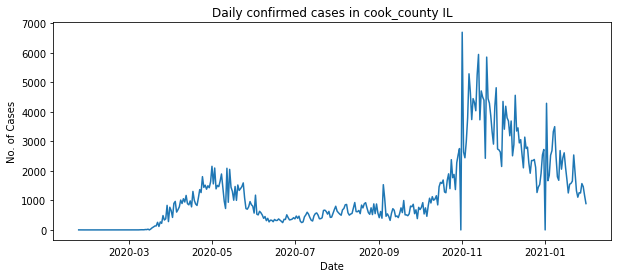

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='case', data=df_cook)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('Daily confirmed cases in cook_county IL')

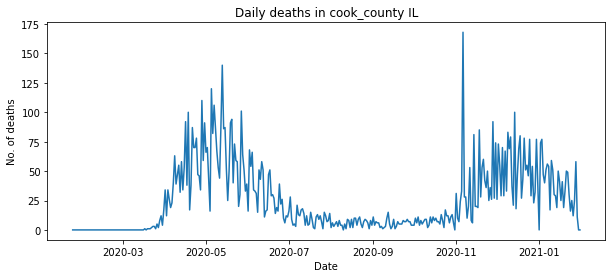

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='death', data=df_cook)
_=plt.ylabel('No. of deaths')
_=plt.xlabel('Date')
_=plt.title('Daily deaths in cook_county IL')

**There are several spikes in the data, hence the moving average will be used for further analysis.** 

### Visualization of daily cases to explore the effect of holidays in case surge

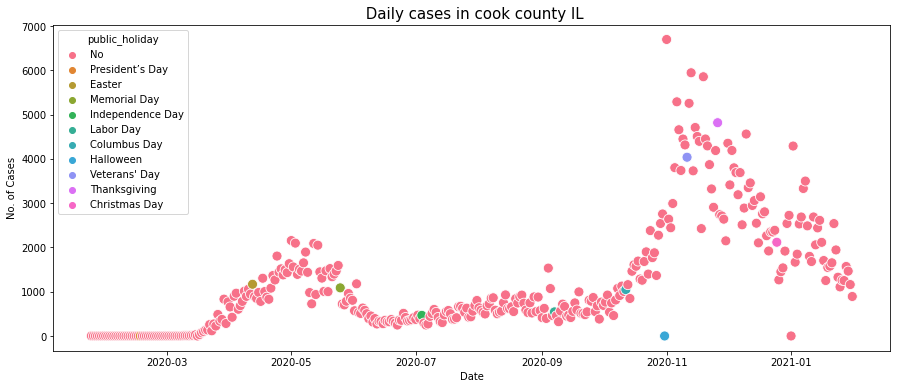

In [ ]:
#Visualization of confirmed cases and public holidays
il['date'] = pd.to_datetime(il['date'])
_=plt.figure(figsize=(15,6))
_=sns.scatterplot(x='date',y='case', data=df_cook, hue='public_holiday', s=100)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title(' Daily cases in cook county IL', fontsize=15)

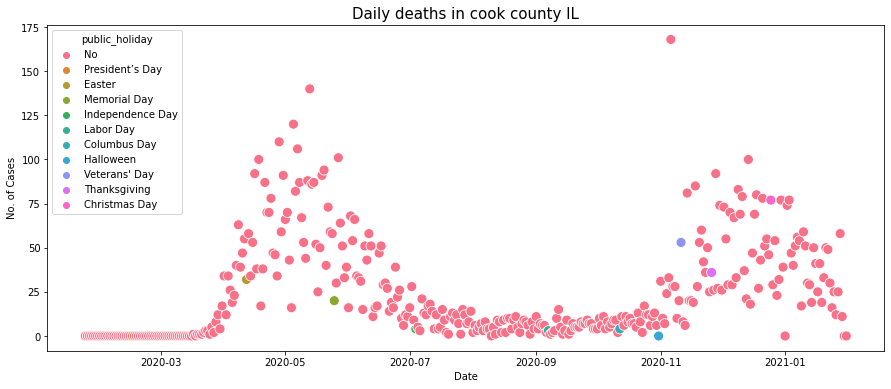

In [ ]:
#Visualization of confirmed cases and public holidays
il['date'] = pd.to_datetime(il['date'])
_=plt.figure(figsize=(15,6))
_=sns.scatterplot(x='date',y='death', data=df_cook, hue='public_holiday', s=100)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('Daily deaths in cook county IL', fontsize=15)

**Similar to the US and IL state, it can be seen that all the holidays does not contributed for holidays surge. Furthermore, the effect of holidays in case surge will be analyzed by ANOVA testing in the next section.**

#### Additional Feature: Temperature

In [ ]:
cook_temp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3/temp_cook.csv')
cook_temp.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS
0,US1ILCK0107,"EVANSTON 1.4 N, IL US",2020-06-26,NaN,NaN,NaN,NaN
1,US1ILCK0107,"EVANSTON 1.4 N, IL US",2020-09-01,NaN,NaN,NaN,NaN
2,US1ILCK0107,"EVANSTON 1.4 N, IL US",2020-09-02,NaN,NaN,NaN,NaN
3,US1ILCK0107,"EVANSTON 1.4 N, IL US",2020-09-03,NaN,NaN,NaN,NaN
4,US1ILCK0107,"EVANSTON 1.4 N, IL US",2020-09-04,NaN,NaN,NaN,NaN


In [ ]:
cook_temp=cook_temp[cook_temp['STATION']=='USC00116616'][['STATION','DATE','TAVG','TMAX','TMIN']]
cook_temp.drop('TAVG',axis=1, inplace=True)
cook_temp.ffill(axis = 0, inplace=True)
cook_temp['TAVG']=(cook_temp['TMAX']+cook_temp['TMIN'])/2
cook_temp=cook_temp[['DATE','TAVG']]
cook_temp.rename(columns={'DATE':'date','TAVG':'avg.temp'}, inplace=True)
cook_temp['date'] = pd.to_datetime(cook_temp['date'])
cook_temp=cook_temp[cook_temp['date']<='2021-01-31']
cook_temp 

,date,avg.temp
1578,2020-01-01,25.0
1579,2020-01-02,31.0
1580,2020-01-03,41.5
1581,2020-01-04,34.5
1582,2020-01-05,29.5
...,...,...
1970,2021-01-27,26.5
1971,2021-01-28,19.0
1972,2021-01-29,18.0
1973,2021-01-30,23.5


In [ ]:
#Merging temp on df_cook
df_cook=df_cook.merge(cook_temp, how='left',on='date' )
df_cook.head()

,date,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week,case,death,avg.temp
0,2020-01-24,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday,1.0,0.0,31.5
1,2020-01-25,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday,0.0,0.0,34.5
2,2020-01-26,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday,0.0,0.0,31.0
3,2020-01-27,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday,0.0,0.0,29.5
4,2020-01-28,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday,0.0,0.0,31.5


#### Additional Feature: Mobility

In [ ]:
mobility=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/trips_by_distance.csv',parse_dates=True)
mobility.head()

,Unnamed: 0,date,county,state_code,pop_stay_at_home,pop_not_stay_at_home,trips
0,39437,2019-01-01T00:00:00.000,Cook County,IL,1396803.0,3767856.0,15198911.0
1,40157,2019-01-01T00:00:00.000,Cook County,MN,1354.0,4023.0,12386.0
2,42010,2019-01-01T00:00:00.000,Cook County,GA,2592.0,14518.0,51361.0
3,42862,2019-01-02T00:00:00.000,Cook County,GA,2143.0,14967.0,69360.0
4,43050,2019-01-02T00:00:00.000,Cook County,IL,1113847.0,4050812.0,19223606.0


In [ ]:
mobility_cook=mobility[mobility['state_code']=='IL'][['date','pop_stay_at_home', 'pop_not_stay_at_home']]
mobility_cook['total']=mobility_cook['pop_not_stay_at_home']+mobility_cook['pop_stay_at_home']
mobility_cook['ratio_pop_not_stay_and_stay']=mobility_cook['pop_not_stay_at_home']/mobility_cook['pop_stay_at_home']
mobility_cook['ratio_pop_stay_and_not_stay']=mobility_cook['pop_stay_at_home']/mobility_cook['pop_not_stay_at_home']
mobility_cook=mobility_cook[mobility_cook['date']<'2021-02-01']
mobility_cook['date']=pd.to_datetime(mobility_cook['date'])
mobility_cook

,date,pop_stay_at_home,pop_not_stay_at_home,total,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay
0,2019-01-01,1396803.0,3767856.0,5164659.0,2.697486,0.370716
4,2019-01-02,1113847.0,4050812.0,5164659.0,3.636776,0.274969
7,2019-01-03,1130134.0,4034525.0,5164659.0,3.569953,0.280116
10,2019-01-04,1100928.0,4063731.0,5164659.0,3.691187,0.270916
13,2019-01-05,1141428.0,4023231.0,5164659.0,3.524735,0.283709
...,...,...,...,...,...,...
2272,2021-01-27,1531688.0,3648805.0,5180493.0,2.382212,0.419778
2275,2021-01-28,1504432.0,3676061.0,5180493.0,2.443488,0.409251
2278,2021-01-29,1441925.0,3738568.0,5180493.0,2.592762,0.385689
2281,2021-01-30,1467123.0,3713370.0,5180493.0,2.531056,0.395092


In [ ]:
#Merging mobility on df_cook
df_cook=df_cook.merge(mobility_cook,how='left',on='date')
df_cook.head()

,date,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,total,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay
0,2020-01-24,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday,1.0,0.0,31.5,1096712.0,4083781.0,5180493.0,3.723659,0.268553
1,2020-01-25,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday,0.0,0.0,34.5,1212883.0,3967610.0,5180493.0,3.271222,0.305696
2,2020-01-26,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday,0.0,0.0,31.0,1300363.0,3880130.0,5180493.0,2.983882,0.335134
3,2020-01-27,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday,0.0,0.0,29.5,1126001.0,4054492.0,5180493.0,3.600789,0.277717
4,2020-01-28,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday,0.0,0.0,31.5,1117075.0,4063418.0,5180493.0,3.637552,0.274910


##### Visualization of mobility 

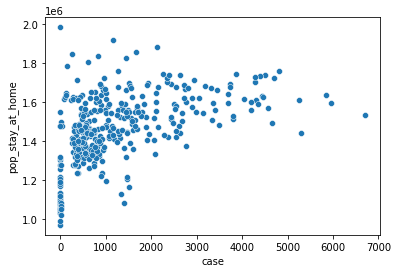

In [ ]:
sns.scatterplot(x='case',y='pop_stay_at_home', data=df_cook)

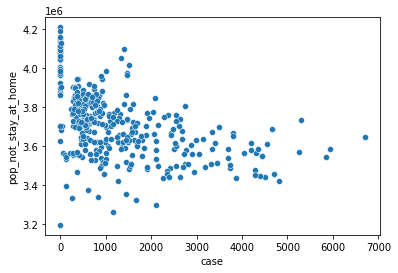

In [ ]:
sns.scatterplot(x='case',y='pop_not_stay_at_home', data=df_cook)

**This shows that people are staying home when cases rises rapidly.**

#### Additional Feature: air_traffic data

In [ ]:
O_hare=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3/Passengers_3_7_2021 12_20_59 PM.csv', skiprows=1)
O_hare

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"2,419,412","373,577","2,792,989"
1,2002,11,"2,147,555","304,355","2,451,910"
2,2002,12,"2,333,151","310,891","2,644,042"
3,2002,TOTAL,"26,360,801","4,329,425","30,690,226"
4,2003,1,"2,069,548","333,455","2,403,003"
...,...,...,...,...,...
236,2020,TOTAL,"12,043,031","1,398,878","10,351,730"
237,NaN,NaN,NaN,NaN,NaN
238,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN


In [ ]:
O_hare=O_hare[['Year','Month','TOTAL']].dropna()
O_hare['Year']=pd.to_datetime(O_hare['Year'])
O_hare['year']=O_hare.Year.dt.year
O_hare.drop('Year', axis=1, inplace=True)
O_hare=O_hare[O_hare['year']>=2019]
O_hare=O_hare[O_hare['Month']!='TOTAL']
O_hare=O_hare[['year','Month','TOTAL']]
O_hare.rename(columns={'Month':'month','TOTAL':'total_o_hare'}, inplace=True)
O_hare

,year,month,total_o_hare
212,2019,1,"2,686,321"
213,2019,2,"2,608,234"
214,2019,3,"3,390,428"
215,2019,4,"3,399,785"
216,2019,5,"3,696,884"
217,2019,6,"3,865,384"
218,2019,7,"3,963,371"
219,2019,8,"3,893,370"
220,2019,9,"3,413,543"
221,2019,10,"3,642,950"


In [ ]:
Midway=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3/Passengers_3_7_2021 12_21_40 PM.csv',skiprows=1)
Midway

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"665,802","6,072","671,874"
1,2002,11,"594,239","7,238","601,477"
2,2002,12,"648,530","9,818","658,348"
3,2002,TOTAL,"7,786,984","98,402","7,885,386"
4,2003,1,"592,979","15,910","608,889"
...,...,...,...,...,...
236,2020,TOTAL,"3,754,881","87,995","2,840,131"
237,NaN,NaN,NaN,NaN,NaN
238,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN


In [ ]:
Midway=Midway[['Year','Month','TOTAL']].dropna()
Midway['Year']=pd.to_datetime(Midway['Year'])
Midway['year']=Midway.Year.dt.year
Midway.drop('Year', axis=1, inplace=True)
Midway=Midway[Midway['year']>=2019]
Midway=Midway[Midway['Month']!='TOTAL']
Midway=Midway[['year','Month','TOTAL']]
Midway.rename(columns={'Month':'month','TOTAL':'total_midway'}, inplace=True)
Midway

,year,month,total_midway
212,2019,1,"641,003"
213,2019,2,"624,722"
214,2019,3,"864,491"
215,2019,4,"885,251"
216,2019,5,"933,679"
217,2019,6,"930,378"
218,2019,7,"935,516"
219,2019,8,"930,087"
220,2019,9,"839,427"
221,2019,10,"921,897"


In [ ]:
air_cook=O_hare.merge(Midway, how='left', on=['year','month'])
air_cook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          20 non-null     int64 
 1   month         20 non-null     object
 2   total_o_hare  20 non-null     object
 3   total_midway  20 non-null     object
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [ ]:
air_cook=air_cook.apply(pd.to_numeric,errors='ignore')
air_cook['total_o_hare']=air_cook['total_o_hare'].str.replace(',','')
air_cook['total_midway']= air_cook['total_midway'].str.replace(',','')
air_cook[['total_o_hare','total_midway']]=air_cook[['total_o_hare','total_midway']].astype(int)
air_cook['total']=air_cook['total_o_hare']+air_cook['total_midway']
air_cook=air_cook[['year','month','total']]
air_cook['pct_change']=air_cook['total'].pct_change()
air_cook

,year,month,total,pct_change
0,2019,1,3327324,NaN
1,2019,2,3232956,-0.028362
2,2019,3,4254919,0.316108
3,2019,4,4285036,0.007078
4,2019,5,4630563,0.080636
5,2019,6,4795762,0.035676
6,2019,7,4898887,0.021503
7,2019,8,4823457,-0.015397
8,2019,9,4252970,-0.118273
9,2019,10,4564847,0.073332


In [ ]:
#Extrapolatin data for the remaining months of 2020/21 considering percentage change in 2019/20
nine=air_cook[(air_cook['year']==2020) & (air_cook['month']==8)]['total'].values[0]*(1+air_cook[(air_cook['year']==2019) & (air_cook['month']==9)]['pct_change'].values[0])
ten=nine*(1+air_cook[(air_cook['year']==2019) & (air_cook['month']==10)]['pct_change'].values[0])
eleven=ten*(1+air_cook[(air_cook['year']==2019) & (air_cook['month']==11)]['pct_change'].values[0])
twelve=eleven*(1+air_cook[(air_cook['year']==2019) & (air_cook['month']==12)]['pct_change'].values[0])
one=twelve*(1+air_cook[(air_cook['year']==2020) & (air_cook['month']==1)]['pct_change'].values[0])
two=one*(1+air_cook[(air_cook['year']==2020) & (air_cook['month']==2)]['pct_change'].values[0])


In [ ]:
#appending new data to air_cook
air_cook_1=pd.DataFrame([[2020,9,nine],[2020,10,ten],[2020,11,eleven],[2020,12,twelve],[2021,1,one],[2021,2,two]], columns=air_cook.drop('pct_change',axis=1).columns)
air_cook=air_cook.drop('pct_change',axis=1).append(air_cook_1)
air_cook.rename(columns={'year':'Year','month':'Month'}, inplace=True)
air_cook

,Year,Month,total
0,2019,1,3.327324e+06
1,2019,2,3.232956e+06
2,2019,3,4.254919e+06
3,2019,4,4.285036e+06
4,2019,5,4.630563e+06
5,2019,6,4.795762e+06
6,2019,7,4.898887e+06
7,2019,8,4.823457e+06
8,2019,9,4.252970e+06
9,2019,10,4.564847e+06


In [ ]:
df_cook['date']=pd.to_datetime(df_cook['date'])
air_cook.rename(columns={'year':'Year','month':'Month'},inplace=True)
dates=df_cook['date'].values
dates=pd.to_datetime(dates)

air_traffic=[]
for date in dates:
  if date <pd.to_datetime('2020-02-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==1)]['total'].values[0])
  elif date <pd.to_datetime('2020-03-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==2)]['total'].values[0])
  elif date <pd.to_datetime('2020-04-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==3)]['total'].values[0])
  elif date <pd.to_datetime('2020-05-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==4)]['total'].values[0])
  elif date <pd.to_datetime('2020-06-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==5)]['total'].values[0])
  elif date <pd.to_datetime('2020-07-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==6)]['total'].values[0])
  elif date <pd.to_datetime('2020-08-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==7)]['total'].values[0])
  elif date <pd.to_datetime('2020-09-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==8)]['total'].values[0])
  elif date <pd.to_datetime('2020-10-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==9)]['total'].values[0])
  elif date <pd.to_datetime('2020-11-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==10)]['total'].values[0])
  elif date <pd.to_datetime('2020-12-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==11)]['total'].values[0])
  elif date <pd.to_datetime('2021'):
    air_traffic.append(air_cook[(air_cook['Year']==2020)&(air_cook['Month']==12)]['total'].values[0])
  
  elif date <pd.to_datetime('2021-02-01'):
    air_traffic.append(air_cook[(air_cook['Year']==2021)&(air_cook['Month']==1)]['total'].values[0])
  else:
    air_traffic.append(np.nan)

cook_air_traffic=pd.DataFrame(list(zip(dates,air_traffic)), columns=['date','air_traffic'])
cook_air_traffic  

,date,air_traffic
0,2020-01-24,3545834.0
1,2020-01-25,3545834.0
2,2020-01-26,3545834.0
3,2020-01-27,3545834.0
4,2020-01-28,3545834.0
...,...,...
383,2021-02-10,NaN
384,2021-02-11,NaN
385,2021-02-12,NaN
386,2021-02-13,NaN


In [ ]:
#Merging air_traffic data to df_cook
df_cook=df_cook.merge(cook_air_traffic,how='left',on='date')
df_cook

,date,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,total,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,air_traffic
0,2020-01-24,No,No,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday,1.0,0.0,31.5,1096712.0,4083781.0,5180493.0,3.723659,0.268553,3545834.0
1,2020-01-25,No,No,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday,0.0,0.0,34.5,1212883.0,3967610.0,5180493.0,3.271222,0.305696,3545834.0
2,2020-01-26,No,No,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday,0.0,0.0,31.0,1300363.0,3880130.0,5180493.0,2.983882,0.335134,3545834.0
3,2020-01-27,No,No,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday,0.0,0.0,29.5,1126001.0,4054492.0,5180493.0,3.600789,0.277717,3545834.0
4,2020-01-28,No,No,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday,0.0,0.0,31.5,1117075.0,4063418.0,5180493.0,3.637552,0.274910,3545834.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2021-02-10,No,No,no,no,no,yes,yes,yes,383,326,257,356,257,356,304,261,156,102,76,47,2021,2,10,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,2021-02-11,No,No,no,no,no,yes,yes,yes,384,327,258,357,258,357,305,262,157,103,77,48,2021,2,11,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,2021-02-12,No,No,no,no,no,yes,yes,yes,385,328,259,358,259,358,306,263,158,104,78,49,2021,2,12,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,2021-02-13,No,No,no,no,no,yes,yes,yes,386,329,260,359,260,359,307,264,159,105,79,50,2021,2,13,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#rearranging features
df_cook=df_cook[['date', 'case', 'death', 'avg.temp', 'pop_stay_at_home', 'pop_not_stay_at_home','air_traffic','public_holiday', 'gatherings',
       'ratio_pop_not_stay_and_stay', 'ratio_pop_stay_and_not_stay','holiday_surge_cases',
       'stay_home_order', 'BLM_Protest','travel_ban_china',
       'travel_ban_Europe', 'travel_ban_Brazil', 'days_since_outbreak',
       'days_since_stay_home_order', 'days_since_BLM_Protest','days_since_travel_ban_china',
       'days_since_travel_ban_Brazil', 'days_since_travel_ban_Europe',
       'days_since_Easter', 'days_since_Memorial Day', 'days_since_Labor Day',
       'days_since_Halloween', 'days_since_Thanksgiving',
       'days_since_Christmas Day', 'Year', 'Month', 'Day', 'Day_of_week']]

In [ ]:
#Exporting dataset
df_cook.to_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_without_dummies.csv', index=False)


## Inferential statistics

In [ ]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_without_dummies.csv')
df['date']=pd.to_datetime(df['date'])
df=df[df['date']<='2021-01-31']
df.head()

,date,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,air_traffic,public_holiday,gatherings,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week
0,2020-01-24,1.0,0.0,31.5,1096712.0,4083781.0,3545834.0,No,No,3.723659,0.268553,no,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday
1,2020-01-25,0.0,0.0,34.5,1212883.0,3967610.0,3545834.0,No,No,3.271222,0.305696,no,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday
2,2020-01-26,0.0,0.0,31.0,1300363.0,3880130.0,3545834.0,No,No,2.983882,0.335134,no,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday
3,2020-01-27,0.0,0.0,29.5,1126001.0,4054492.0,3545834.0,No,No,3.600789,0.277717,no,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday
4,2020-01-28,0.0,0.0,31.5,1117075.0,4063418.0,3545834.0,No,No,3.637552,0.274910,no,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday


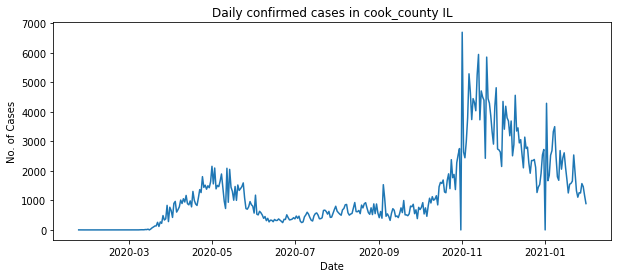

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='case', data=df,)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('Daily confirmed cases in cook_county IL')

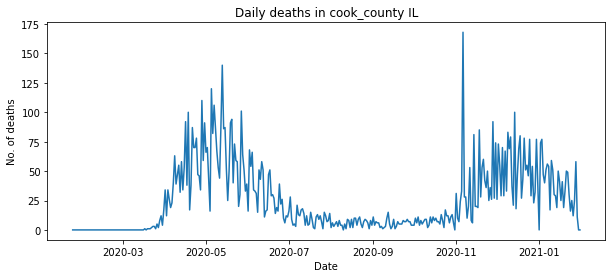

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='death', data=df,)
_=plt.ylabel('No. of deaths')
_=plt.xlabel('Date')
_=plt.title('Daily deaths in cook_county IL')

In [ ]:
#3 days rolling to smooth the data 
df['case']=df['case'].rolling(3, min_periods=1).mean()
df['death']=df['death'].rolling(3, min_periods=1).mean()

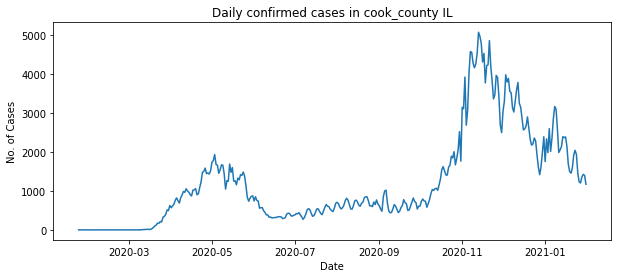

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='case', data=df,)
_=plt.ylabel('No. of Cases')
_=plt.xlabel('Date')
_=plt.title('Daily confirmed cases in cook_county IL')

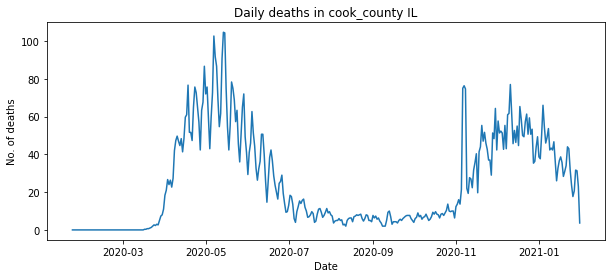

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='death', data=df,)
_=plt.ylabel('No. of deaths')
_=plt.xlabel('Date')
_=plt.title('Daily deaths in cook_county IL')

**Still some unusual peak on Nov., let's explore it.**

In [ ]:
abc=df[(df['date']>'2020-10-15') & (df['date']<'2020-11-30')][['date','death']]
abc

,date,death
266,2020-10-16,8.333333
267,2020-10-17,9.666667
268,2020-10-18,8.333333
269,2020-10-19,8.000000
270,2020-10-20,6.333333
271,2020-10-21,8.333333
272,2020-10-22,8.666667
273,2020-10-23,7.666667
274,2020-10-24,9.000000
275,2020-10-25,10.333333


In [ ]:
abc['avg.death']=abc['death'].rolling(10).mean()
abc[(df['date']>='2020-11-06') & (df['date']<='2020-11-08')][['date','death','avg.death']]

,date,death,avg.death
287,2020-11-06,75.000000,18.800000
288,2020-11-07,76.333333,25.466667
289,2020-11-08,74.666667,31.933333


In [ ]:
df1=df[df['date']<'2020-11-06']
df2=df[(df['date']>='2020-11-06') & (df['date']<='2020-11-08')]
df3=df[df['date']>'2020-11-08']
df2['death']=[18.800000,25.466667,31.933333]
df=df1.append(df2).append(df3)
df[(df['date']>='2020-11-06') & (df['date']<='2020-11-08')]

,date,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,air_traffic,public_holiday,gatherings,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week
287,2020-11-06,4027.333333,18.800000,59.0,1442803.0,3737690.0,1.164003e+06,No,No,2.590575,0.386015,no,no,no,yes,yes,yes,287,230,161,260,161,260,208,165,60,6,0,0,2020,11,6,Friday
288,2020-11-07,4582.666667,25.466667,60.5,1492917.0,3687576.0,1.164003e+06,No,No,2.470048,0.404851,yes,no,no,yes,yes,yes,288,231,162,261,162,261,209,166,61,7,0,0,2020,11,7,Saturday
289,2020-11-08,4561.666667,31.933333,60.0,1689945.0,3490548.0,1.164003e+06,No,No,2.065480,0.484149,yes,no,no,yes,yes,yes,289,232,163,262,163,262,210,167,62,8,0,0,2020,11,8,Sunday


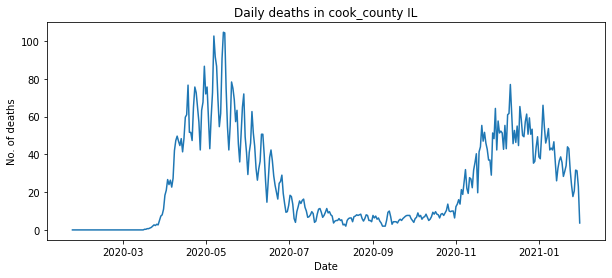

In [ ]:
#visualization
_=plt.figure(figsize=(10,4))
_=sns.lineplot(x='date',y='death', data=df,)
_=plt.ylabel('No. of deaths')
_=plt.xlabel('Date')
_=plt.title('Daily deaths in cook_county IL')

### Correlation

#### Numeric Features and their correlation with Target(Case)

In [ ]:
df_numeric=df[df.select_dtypes('number').columns]
df_numeric

,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,air_traffic,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day
0,1.000000,0.000000,31.5,1096712.0,4083781.0,3.545834e+06,3.723659,0.268553,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24
1,0.500000,0.000000,34.5,1212883.0,3967610.0,3.545834e+06,3.271222,0.305696,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25
2,0.333333,0.000000,31.0,1300363.0,3880130.0,3.545834e+06,2.983882,0.335134,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26
3,0.000000,0.000000,29.5,1126001.0,4054492.0,3.545834e+06,3.600789,0.277717,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27
4,0.000000,0.000000,31.5,1117075.0,4063418.0,3.545834e+06,3.637552,0.274910,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1206.333333,20.666667,26.5,1531688.0,3648805.0,1.044186e+06,2.382212,0.419778,369,312,243,342,243,342,290,247,142,88,62,33,2021,1,27
370,1360.333333,31.666667,19.0,1504432.0,3676061.0,1.044186e+06,2.443488,0.409251,370,313,244,343,244,343,291,248,143,89,63,34,2021,1,28
371,1428.666667,31.333333,18.0,1441925.0,3738568.0,1.044186e+06,2.592762,0.385689,371,314,245,344,245,344,292,249,144,90,64,35,2021,1,29
372,1398.666667,23.000000,23.5,1467123.0,3713370.0,1.044186e+06,2.531056,0.395092,372,315,246,345,246,345,293,250,145,91,65,36,2021,1,30


In [ ]:
#Correlation with Cases
corr=pd.DataFrame(df_numeric.corr()['case'].sort_values(ascending=False)).reset_index()
corr.columns=['features','corr. with cases']
corr

,features,corr. with cases
0,case,1.000000
1,days_since_Labor Day,0.691409
2,days_since_BLM_Protest,0.687914
3,days_since_travel_ban_Brazil,0.687914
4,days_since_Memorial Day,0.685322
5,days_since_travel_ban_Europe,0.683862
6,days_since_travel_ban_china,0.683862
7,days_since_outbreak,0.683327
8,days_since_stay_home_order,0.681669
9,days_since_Easter,0.677258


**As expected, average temp. negatively correlates with no. of cases whereas the days since outbreaks and other events positively correlates with cases. Some features like air_traffic, pop_not_staying at home are showing negative correlation, this suggest, when cases are rapidly increasing people stayed at home and also the air traffic also gets decreased.**

#### correlation with lagged features

In [ ]:
features_for_lag=['death', 'avg.temp', 'pop_stay_at_home', 'pop_not_stay_at_home',
       'air_traffic', 'days_since_outbreak',
       'days_since_stay_home_order', 'days_since_BLM_Protest','days_since_travel_ban_china',
       'days_since_travel_ban_Brazil', 'days_since_Easter',
       'days_since_Memorial Day', 'days_since_Labor Day',
       'days_since_Halloween', 'days_since_Thanksgiving',
       'days_since_Christmas Day', 'Year', 'Month', 'Day']

for feature in features_for_lag:
  lagged_feature_name=feature
  lagged_feature=[]
  for i in range(len(df_numeric)):
    if i<=14:
      lagged_feature.append(np.nan)
    else:
      lagged_feature.append(df_numeric[feature][i-15])
  df_numeric[lagged_feature_name]=lagged_feature

#Lagged for case
features_for_lag=['case']

for feature in features_for_lag:
  lagged_feature_name=str(feature)+'_lag_14'
  lagged_feature=[]
  for i in range(len(df_numeric)):
    if i<=14:
      lagged_feature.append(np.nan)
    else:
      lagged_feature.append(df_numeric[feature][i-15])
  df_numeric[lagged_feature_name]=lagged_feature

df_numeric.head(20)

,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,air_traffic,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,case_lag_14
0,1.000000,NaN,NaN,NaN,NaN,NaN,3.723659,0.268553,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.500000,NaN,NaN,NaN,NaN,NaN,3.271222,0.305696,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.333333,NaN,NaN,NaN,NaN,NaN,2.983882,0.335134,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,NaN,NaN,NaN,NaN,NaN,3.600789,0.277717,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,NaN,NaN,NaN,NaN,NaN,3.637552,0.274910,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,NaN,NaN,NaN,NaN,NaN,3.644941,0.274353,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.333333,NaN,NaN,NaN,NaN,NaN,3.722461,0.268639,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.333333,NaN,NaN,NaN,NaN,NaN,3.835057,0.260752,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.333333,NaN,NaN,NaN,NaN,NaN,3.425283,0.291947,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.000000,NaN,NaN,NaN,NaN,NaN,3.126719,0.319824,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr_lag_14=pd.DataFrame(df_numeric.dropna().corr()['case'].sort_values(ascending=False)).reset_index()
corr_lag_14.columns=['features','corr. with cases_lagged_14']
corr_lag_14

,features,corr. with cases_lagged_14
0,case,1.000000
1,case_lag_14,0.809772
2,days_since_BLM_Protest,0.690025
3,days_since_travel_ban_Brazil,0.690025
4,days_since_Memorial Day,0.686915
5,days_since_travel_ban_Europe,0.669024
6,days_since_outbreak,0.668936
7,days_since_travel_ban_china,0.668789
8,days_since_Labor Day,0.666401
9,days_since_stay_home_order,0.664712


In [ ]:
corr_lag_14=corr_lag_14.drop(index=0)
corr_lag_14['features'].replace({'case_lag_14':'case'}, inplace=True)

corr.merge(corr_lag_14,on='features')

,features,corr. with cases,corr. with cases_lagged_14
0,case,1.000000,0.809772
1,days_since_Labor Day,0.691409,0.666401
2,days_since_BLM_Protest,0.687914,0.690025
3,days_since_travel_ban_Brazil,0.687914,0.690025
4,days_since_Memorial Day,0.685322,0.686915
5,days_since_travel_ban_Europe,0.683862,0.669024
6,days_since_travel_ban_china,0.683862,0.668789
7,days_since_outbreak,0.683327,0.668936
8,days_since_stay_home_order,0.681669,0.664712
9,days_since_Easter,0.677258,0.663282


#### Visualization of highly correlated features

Correlation:
r is: -0.2738395336344072 and associated p value is: 7.395673876718243e-08


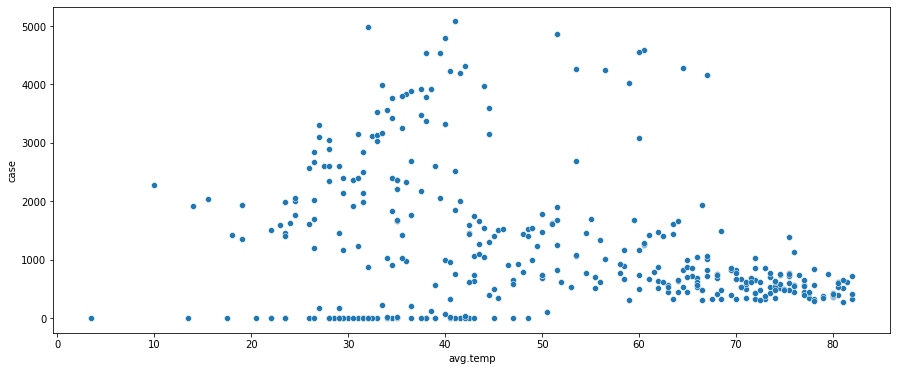

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='avg.temp',y='case', data=df)

print('Correlation:')
from scipy import stats
print ('r is: {} and associated p value is: {}' .format(stats.pearsonr(df['case'].values, df['avg.temp'].values)[0],stats.pearsonr(df['case'].values, df['avg.temp'].values)[1]))

**A negative correlation between avg.temp and cases**

Correlation:
r is: 0.6833268863408347 and associated p value is: 9.150562450401863e-53


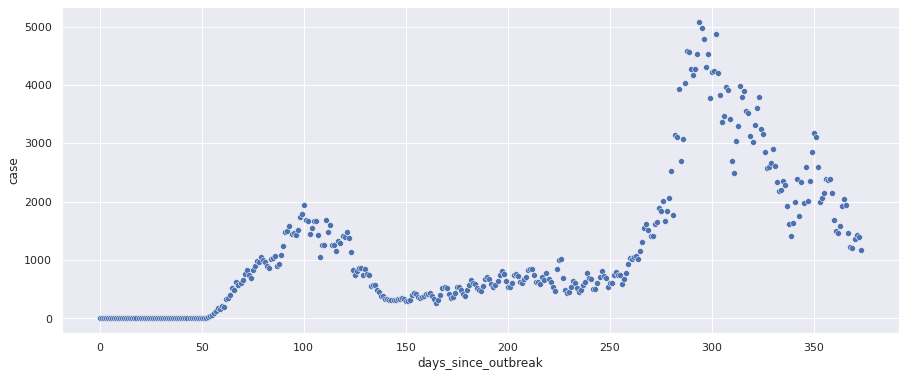

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='days_since_outbreak',y='case', data=df)

print('Correlation:')
from scipy import stats
print ('r is: {} and associated p value is: {}' .format(stats.pearsonr(df['case'].values, df['days_since_outbreak'].values)[0],stats.pearsonr(df['case'].values, df['days_since_outbreak'].values)[1]))

**A Positive correlation with days since outbreaks**

Correlation:
r is: 0.5602096107799558 and associated p value is: 2.7622198759508546e-32


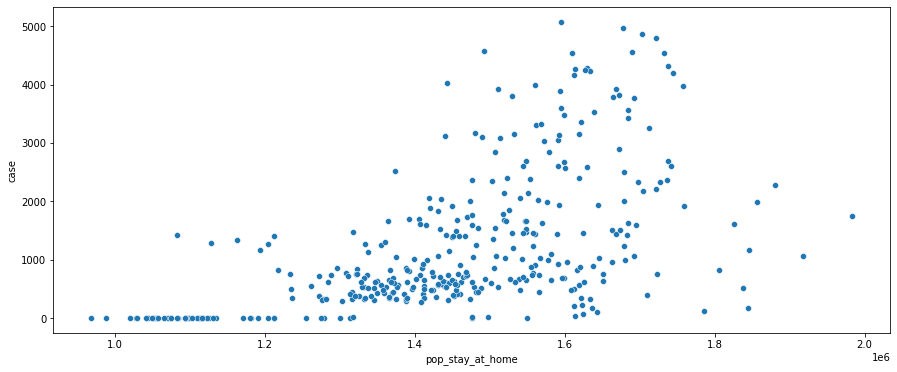

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='pop_stay_at_home',y='case', data=df)

print('Correlation:')
from scipy import stats
print ('r is: {} and associated p value is: {}' .format(stats.pearsonr(df['case'].values, df['pop_stay_at_home'].values)[0],stats.pearsonr(df['case'].values, df['pop_stay_at_home'].values)[1]))

**A Positive correlation with population staying at home**

### ANOVA

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3/df_cook_without_dummies.csv')
df['date']=pd.to_datetime(df['date'])
df_averaged=df.copy()
df_averaged['case']=df_averaged['case'].rolling(3, min_periods=1).mean()
df_averaged['death']=df_averaged['death'].rolling(3, min_periods=1).mean()
df_averaged.head()

,date,case,death,avg.temp,pop_stay_at_home,pop_not_stay_at_home,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,air_traffic,public_holiday,gatherings,holiday_surge_cases,population,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_at_home_order,days_since_blm_protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Day_of_week
0,2020-01-24,1.000000,0.0,31.5,1096712.0,4083781.0,3.723659,0.268553,3545834.0,No,No,no,1,no,no,no,no,no,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,Friday
1,2020-01-25,0.500000,0.0,34.5,1212883.0,3967610.0,3.271222,0.305696,3545834.0,No,No,no,1,no,no,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,Saturday
2,2020-01-26,0.333333,0.0,31.0,1300363.0,3880130.0,2.983882,0.335134,3545834.0,No,No,no,1,no,no,no,no,no,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,Sunday
3,2020-01-27,0.000000,0.0,29.5,1126001.0,4054492.0,3.600789,0.277717,3545834.0,No,No,no,1,no,no,no,no,no,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,Monday
4,2020-01-28,0.000000,0.0,31.5,1117075.0,4063418.0,3.637552,0.274910,3545834.0,No,No,no,1,no,no,no,no,no,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,Tuesday


#### Public Holiday

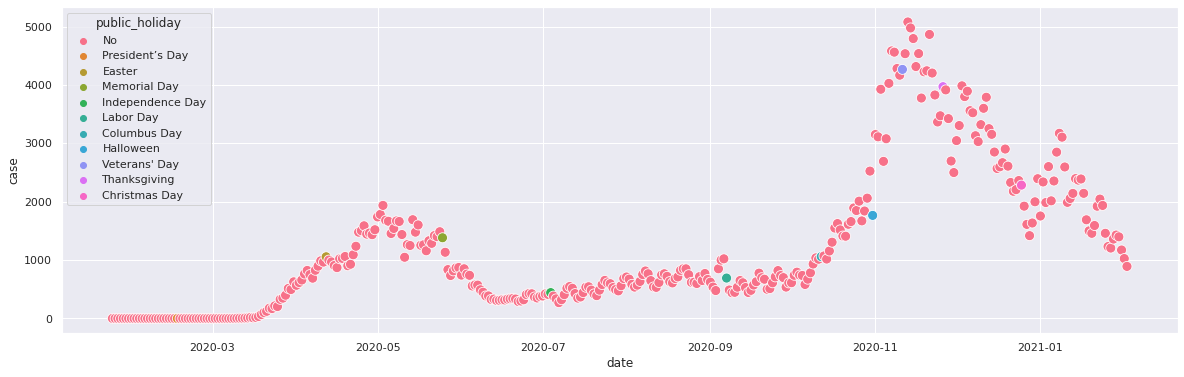

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_averaged, hue='public_holiday', s=100)

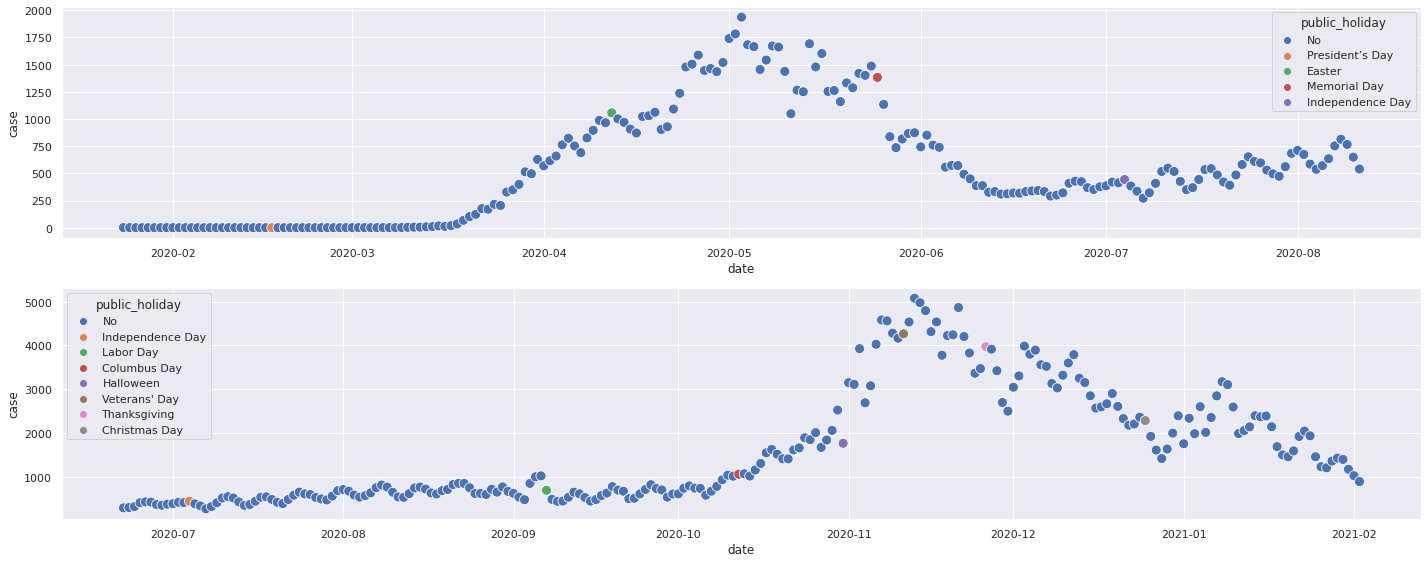

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=2,ncols=1,figsize=(20,8))
sns.scatterplot(x='date',y='case', data=df_averaged.loc[:200,:], hue='public_holiday', s=100, ax=ax1)
sns.scatterplot(x='date',y='case', data=df_averaged.loc[150:,:], hue='public_holiday', s=100, ax=ax2)
fig.tight_layout()


**Let's examine some of the major holidays to evaluate if they contributed for case surges statistically.**

In [ ]:
df=df_averaged[['date','case','public_holiday']]
df['date']=pd.to_datetime(df['date'])
df['7_day_moving_average']=df['case'].rolling(7).mean()
df

,date,case,public_holiday,7_day_moving_average
0,2020-01-24,1.000000,No,NaN
1,2020-01-25,0.500000,No,NaN
2,2020-01-26,0.333333,No,NaN
3,2020-01-27,0.000000,No,NaN
4,2020-01-28,0.000000,No,NaN
...,...,...,...,...
383,2021-02-10,NaN,No,NaN
384,2021-02-11,NaN,No,NaN
385,2021-02-12,NaN,No,NaN
386,2021-02-13,NaN,No,NaN


**Let's examine Easter, Memorial Day, Labor Day and Christmas**

**Easter**

In [ ]:
df[df['public_holiday']=='Easter']

,date,case,public_holiday,7_day_moving_average
79,2020-04-12,1056.666667,Easter,881.857143


In [ ]:
easter_day=pd.to_datetime(df[df['public_holiday']=='Easter']['date'].values[0]).strftime('%Y-%m-%d')
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df_averaged[df_averaged['public_holiday']=='Easter']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=21)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df_averaged[df_averaged['public_holiday']=='Easter']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=21)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-03-22
2020-05-03


In [ ]:
df_easter=df[(df['date']>=start)&(df['date']<=end)]
df_easter

,date,case,public_holiday,7_day_moving_average
58,2020-03-22,175.333333,No,76.095238
59,2020-03-23,170.000000,No,98.666667
60,2020-03-24,215.333333,No,126.761905
61,2020-03-25,204.333333,No,151.047619
62,2020-03-26,327.333333,No,188.142857
63,2020-03-27,348.333333,No,223.380952
64,2020-03-28,398.333333,No,262.714286
65,2020-03-29,513.666667,No,311.047619
66,2020-03-30,496.000000,No,357.619048
67,2020-03-31,627.666667,No,416.523810


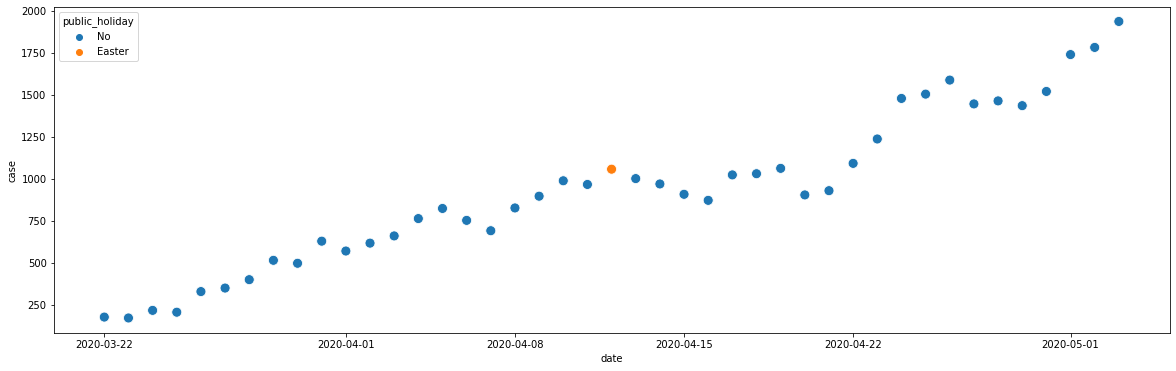

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_easter, hue='public_holiday', s=100)

In [ ]:
#Difference between the moving average and corresponding cases
df_easter['diff']=df_easter['case']-df_easter[df_easter['date']==pd.to_datetime(df_averaged[df_averaged['public_holiday']=='Easter']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]
df_easter

,date,case,public_holiday,7_day_moving_average,diff
58,2020-03-22,175.333333,No,76.095238,-706.523810
59,2020-03-23,170.000000,No,98.666667,-711.857143
60,2020-03-24,215.333333,No,126.761905,-666.523810
61,2020-03-25,204.333333,No,151.047619,-677.523810
62,2020-03-26,327.333333,No,188.142857,-554.523810
63,2020-03-27,348.333333,No,223.380952,-533.523810
64,2020-03-28,398.333333,No,262.714286,-483.523810
65,2020-03-29,513.666667,No,311.047619,-368.190476
66,2020-03-30,496.000000,No,357.619048,-385.857143
67,2020-03-31,627.666667,No,416.523810,-254.190476


In [ ]:
#Average of the no. of cases before and after easter
before_easter=df_easter[df_easter['date']<easter_day]['diff'].values
after_easter=df_easter[df_easter['date']>easter_day]['diff'].values
print ('mean of the cases before and after easter are: {} and {} respectively.'. format(np.mean(before_easter),np.mean(after_easter)))

mean of the cases before and after easter are: -309.39682539682553 and 399.8095238095236 respectively.


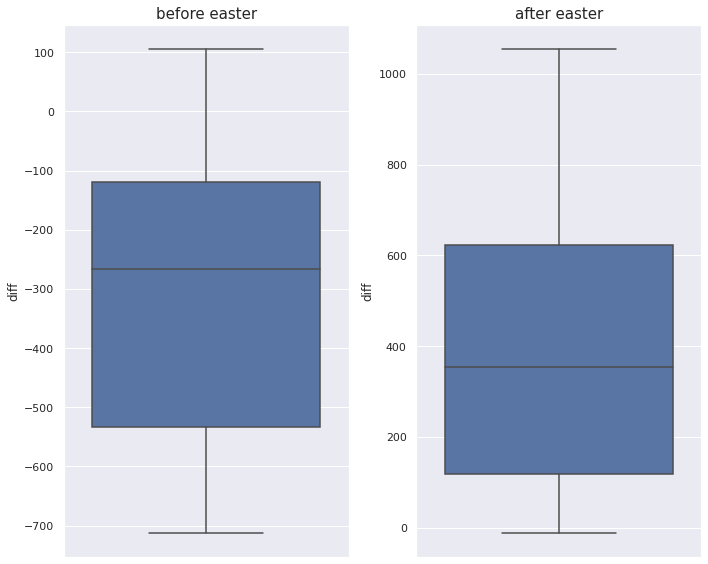

In [ ]:
#Visualization of means
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='public_holiday', data=df_easter[df_easter['date']<easter_day], ax=ax1)
sns.boxplot(y='diff', hue='public_holiday', data=df_easter[df_easter['date']>easter_day], ax=ax2)
ax1.set_title('before easter', fontsize=15)
ax2.set_title('after easter', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_easter,after_easter)
print(fvalue, pvalue)

59.20144525966134 2.0624832764507105e-09


**we can reject null hypothesis, hence means are significantly different. We can conclude that Easter contributed for the cases surge. Still, we can't forget the natural increasing trend of cases during this period.**

**Memorial Day**

In [ ]:
df[df['public_holiday']=='Memorial Day']

,date,case,public_holiday,7_day_moving_average
122,2020-05-25,1382.666667,Memorial Day,1352.571429


In [ ]:
memorial_day=pd.to_datetime(df_averaged[df_averaged['public_holiday']=='Memorial Day']['date'].values[0]).strftime('%Y-%m-%d')
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df_averaged[df_averaged['public_holiday']=='Memorial Day']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=21)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df_averaged[df_averaged['public_holiday']=='Memorial Day']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=21)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-05-04
2020-06-15


In [ ]:
df_memorial=df[(df['date']>=start)&(df['date']<=end)]
df_memorial

,date,case,public_holiday,7_day_moving_average
101,2020-05-04,1682.333333,No,1651.476190
102,2020-05-05,1665.333333,No,1680.285714
103,2020-05-06,1455.000000,No,1683.095238
104,2020-05-07,1542.000000,No,1686.238095
105,2020-05-08,1671.000000,No,1676.428571
106,2020-05-09,1661.666667,No,1659.190476
107,2020-05-10,1438.000000,No,1587.904762
108,2020-05-11,1048.333333,No,1497.333333
109,2020-05-12,1265.333333,No,1440.190476
110,2020-05-13,1250.333333,No,1410.952381


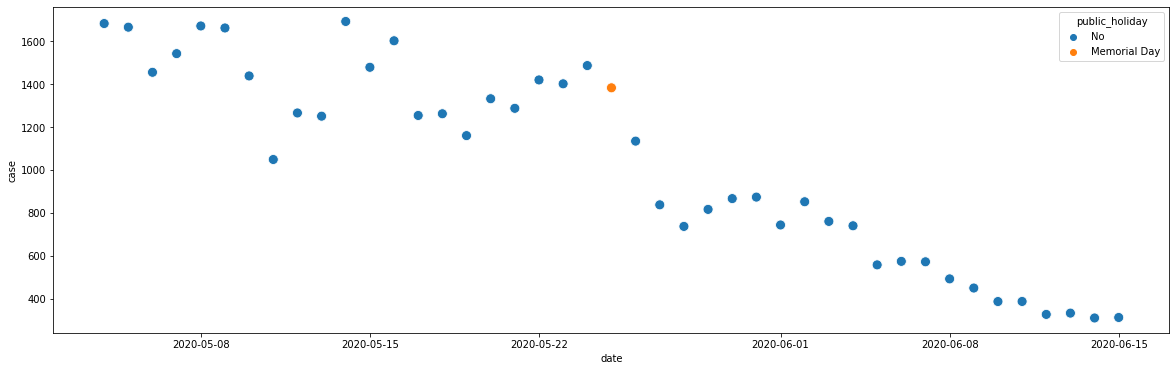

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_memorial, hue='public_holiday', s=100)

In [ ]:
#Difference between the moving average and corresponding cases
df_memorial['diff']=df_memorial['case']-df_memorial[df_memorial['date']==pd.to_datetime(df[df['public_holiday']=='Memorial Day']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]
df_memorial

,date,case,public_holiday,7_day_moving_average,diff
101,2020-05-04,1682.333333,No,1651.476190,329.761905
102,2020-05-05,1665.333333,No,1680.285714,312.761905
103,2020-05-06,1455.000000,No,1683.095238,102.428571
104,2020-05-07,1542.000000,No,1686.238095,189.428571
105,2020-05-08,1671.000000,No,1676.428571,318.428571
106,2020-05-09,1661.666667,No,1659.190476,309.095238
107,2020-05-10,1438.000000,No,1587.904762,85.428571
108,2020-05-11,1048.333333,No,1497.333333,-304.238095
109,2020-05-12,1265.333333,No,1440.190476,-87.238095
110,2020-05-13,1250.333333,No,1410.952381,-102.238095


In [ ]:
#Differences in cases before and after memorial day
before_memorial=df_memorial[df_memorial['date']<memorial_day]['diff'].values
after_memorial=df_memorial[df_memorial['date']>memorial_day]['diff'].values
print ('mean of the cases before and after easter are: {} and {} respectively.'. format(np.mean(before_memorial),np.mean(after_memorial)))

mean of the cases before and after easter are: 78.49206349206315 and -731.1904761904765 respectively.


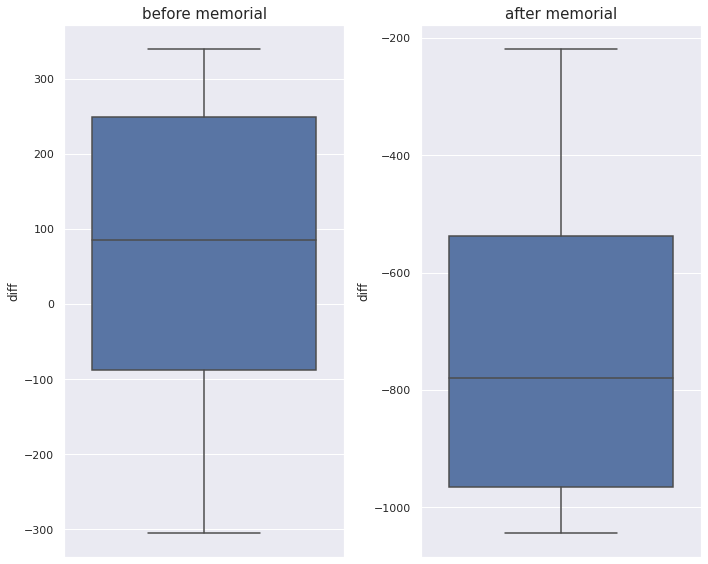

In [ ]:
#Visualization of the differences
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='public_holiday', data=df_memorial[df_memorial['date']<memorial_day], ax=ax1)
sns.boxplot(y='diff', hue='public_holiday', data=df_memorial[df_memorial['date']>memorial_day], ax=ax2)
ax1.set_title('before memorial', fontsize=15)
ax2.set_title('after memorial', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_memorial,after_memorial)
print(fvalue, pvalue)

150.387975149001 3.936483842352907e-15


**we can reject null hypothesis, hence means are significantly different. Data shows cases decreased after memorial day. For me, this is due to the natural decrease in cases after first peak.**

**Christmas**

In [ ]:
df[df['public_holiday']=='Christmas Day']

,date,case,public_holiday,7_day_moving_average
336,2020-12-25,2284.333333,Christmas Day,2410.47619


In [ ]:
christmas_day=pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d')
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=21)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=21)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-12-04
2021-01-15


In [ ]:
df_christmas=df[(df['date']>=start)&(df['date']<=end)]
df_christmas

,date,case,public_holiday,7_day_moving_average
315,2020-12-04,3800.000000,No,3250.904762
316,2020-12-05,3893.000000,No,3318.000000
317,2020-12-06,3559.666667,No,3441.238095
318,2020-12-07,3523.666667,No,3587.523810
319,2020-12-08,3130.333333,No,3599.476190
320,2020-12-09,3030.000000,No,3560.238095
321,2020-12-10,3320.333333,No,3465.285714
322,2020-12-11,3600.000000,No,3436.714286
323,2020-12-12,3789.333333,No,3421.904762
324,2020-12-13,3251.666667,No,3377.904762


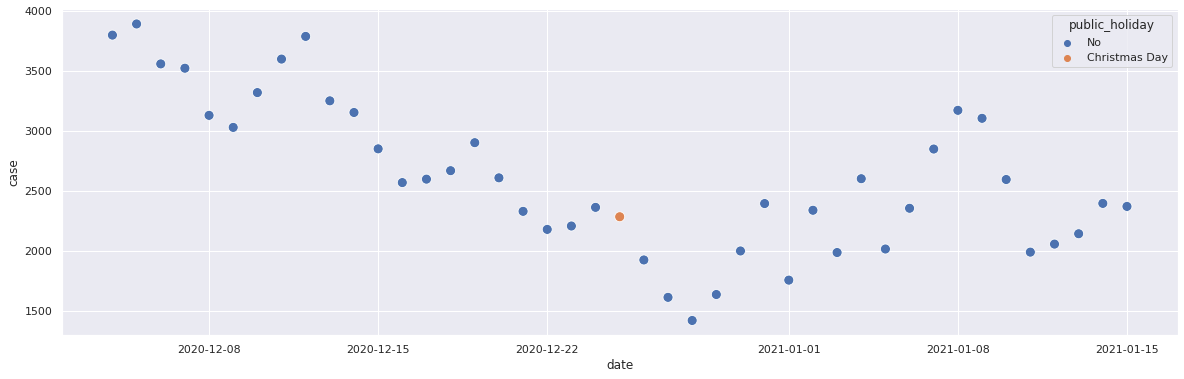

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_christmas, hue='public_holiday', s=100)

In [ ]:
#Differences between the moving average and corresponding cases
df_christmas['diff']=df_christmas['case']-df_christmas[df_christmas['date']==pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]
df_christmas

,date,case,public_holiday,7_day_moving_average,diff
315,2020-12-04,3800.000000,No,3250.904762,1389.523810
316,2020-12-05,3893.000000,No,3318.000000,1482.523810
317,2020-12-06,3559.666667,No,3441.238095,1149.190476
318,2020-12-07,3523.666667,No,3587.523810,1113.190476
319,2020-12-08,3130.333333,No,3599.476190,719.857143
320,2020-12-09,3030.000000,No,3560.238095,619.523810
321,2020-12-10,3320.333333,No,3465.285714,909.857143
322,2020-12-11,3600.000000,No,3436.714286,1189.523810
323,2020-12-12,3789.333333,No,3421.904762,1378.857143
324,2020-12-13,3251.666667,No,3377.904762,841.190476


In [ ]:
before_christmas=df_christmas[df_christmas['date']<christmas_day]['diff'].values
after_christmas=df_christmas[df_christmas['date']>christmas_day]['diff'].values
len(before_christmas)==len(after_christmas)

True

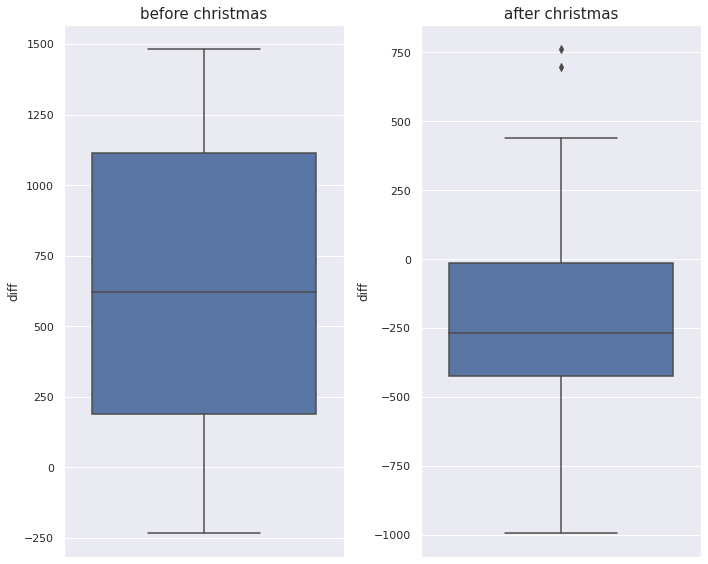

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='public_holiday', data=df_christmas[df_christmas['date']<christmas_day], ax=ax1)
sns.boxplot(y='diff', hue='public_holiday', data=df_christmas[df_christmas['date']>christmas_day], ax=ax2)
ax1.set_title('before christmas', fontsize=15)
ax2.set_title('after christmas', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_christmas,after_christmas)
print(fvalue, pvalue)

25.315736953853417 1.0709474797983163e-05


**we can reject null hypothesis, hence means are significantly different. Results shows that case decreased after christmas, this should be due to the occurance of christmas on the decreasing side of second peak.**

**Considering 14 days period**

In [ ]:
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=14)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-12-11
2021-01-08


In [ ]:
df_christmas=df[(df['date']>=start)&(df['date']<=end)]
df_christmas

,date,case,public_holiday,7_day_moving_average
322,2020-12-11,3600.000000,No,3436.714286
323,2020-12-12,3789.333333,No,3421.904762
324,2020-12-13,3251.666667,No,3377.904762
325,2020-12-14,3154.333333,No,3325.142857
326,2020-12-15,2851.000000,No,3285.238095
327,2020-12-16,2569.333333,No,3219.428571
328,2020-12-17,2598.000000,No,3116.238095
329,2020-12-18,2668.666667,No,2983.190476
330,2020-12-19,2902.333333,No,2856.476190
331,2020-12-20,2609.000000,No,2764.666667


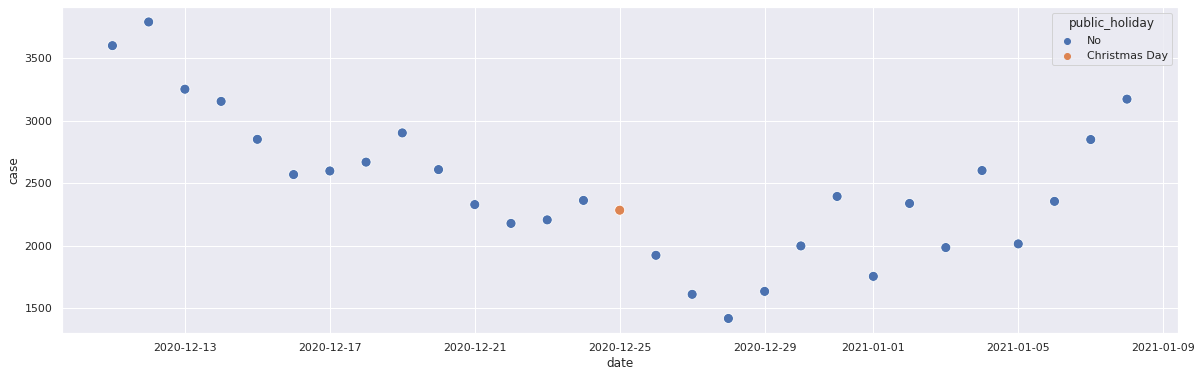

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_christmas, hue='public_holiday', s=100)

In [ ]:
df_christmas['diff']=df_christmas['case']-df_christmas[df_christmas['date']==pd.to_datetime(df[df['public_holiday']=='Christmas Day']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]

In [ ]:
before_christmas=df_christmas[df_christmas['date']<christmas_day]['diff'].values
after_christmas=df_christmas[df_christmas['date']>christmas_day]['diff'].values
print('mean of the cases before and after christmas are: {} and {} respectively.'.format(np.mean(before_christmas),np.mean(after_christmas)))

mean of the cases before and after christmas are: 380.33333333333394 and -263.6904761904756 respectively.


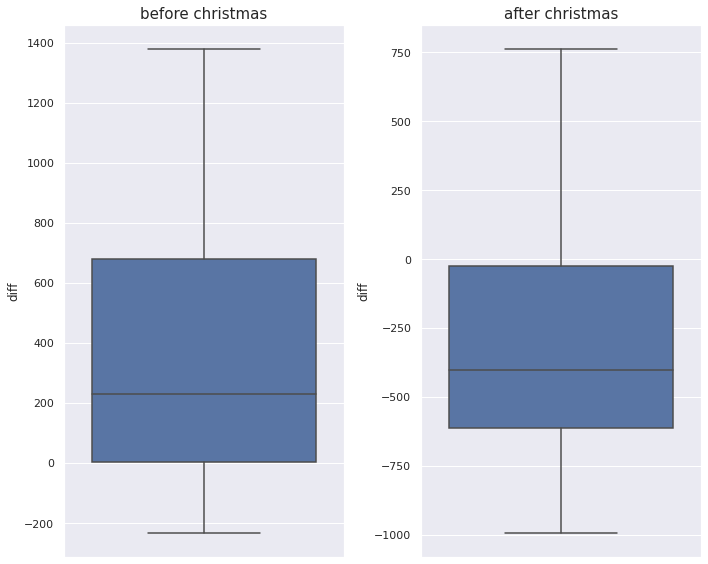

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='public_holiday', data=df_christmas[df_christmas['date']<christmas_day], ax=ax1)
sns.boxplot(y='diff', hue='public_holiday', data=df_christmas[df_christmas['date']>christmas_day], ax=ax2)
ax1.set_title('before christmas', fontsize=15)
ax2.set_title('after christmas', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_christmas,after_christmas)
print(fvalue, pvalue)

11.616333505710838 0.002139660808715712


**we can reject null hypothesis, hence means are significantly different. Results shows that case decreased after christmas, this should be due to the occurance of christmas on the decreasing side of second peak.**

#### Stay at home order

In [ ]:
df=df_averaged[['date','case','stay_home_order']]
df['date']=pd.to_datetime(df['date'])
df['7_day_moving_average']=df['case'].rolling(7,min_periods=1).mean()
df

,date,case,stay_home_order,7_day_moving_average
0,2020-01-24,1.000000,no,1.000000
1,2020-01-25,0.500000,no,0.750000
2,2020-01-26,0.333333,no,0.611111
3,2020-01-27,0.000000,no,0.458333
4,2020-01-28,0.000000,no,0.366667
...,...,...,...,...
383,2021-02-10,NaN,no,NaN
384,2021-02-11,NaN,no,NaN
385,2021-02-12,NaN,no,NaN
386,2021-02-13,NaN,no,NaN


In [ ]:
stay_home_order_start_day=pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d')
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=21)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=21)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-02-29
2020-04-11


In [ ]:
df_stay_home=df[(df['date']>=start)&(df['date']<=end)]
df_stay_home

,date,case,stay_home_order,7_day_moving_average
36,2020-02-29,0.333333,no,0.047619
37,2020-03-01,0.333333,no,0.095238
38,2020-03-02,0.666667,no,0.190476
39,2020-03-03,0.333333,no,0.238095
40,2020-03-04,0.333333,no,0.285714
41,2020-03-05,0.333333,no,0.333333
42,2020-03-06,0.666667,no,0.428571
43,2020-03-07,0.666667,no,0.476190
44,2020-03-08,0.666667,no,0.523810
45,2020-03-09,1.666667,no,0.666667


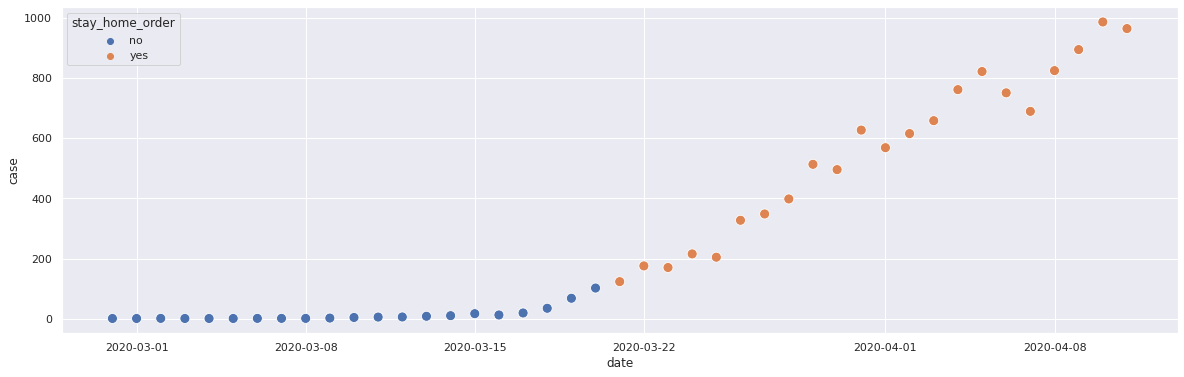

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_stay_home, hue='stay_home_order', s=100)

In [ ]:
#Differences 
df_stay_home['diff']=df_stay_home[df_stay_home['date']==pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]-df_stay_home['case']
df_stay_home

,date,case,stay_home_order,7_day_moving_average,diff
36,2020-02-29,0.333333,no,0.047619,53.047619
37,2020-03-01,0.333333,no,0.095238,53.047619
38,2020-03-02,0.666667,no,0.190476,52.714286
39,2020-03-03,0.333333,no,0.238095,53.047619
40,2020-03-04,0.333333,no,0.285714,53.047619
41,2020-03-05,0.333333,no,0.333333,53.047619
42,2020-03-06,0.666667,no,0.428571,52.714286
43,2020-03-07,0.666667,no,0.476190,52.714286
44,2020-03-08,0.666667,no,0.523810,52.714286
45,2020-03-09,1.666667,no,0.666667,51.714286


In [ ]:
before_stay_home=df_stay_home[df_stay_home['date']<stay_home_order_start_day]['diff'].values
after_stay_home=df_stay_home[df_stay_home['date']>stay_home_order_start_day]['diff'].values
print('mean of the cases before and after stay at home order is: {} and {} respectively.'.format(np.mean(before_stay_home),np.mean(after_stay_home)))

mean of the cases before and after stay at home order is: 39.66666666666666 and -519.079365079365 respectively.


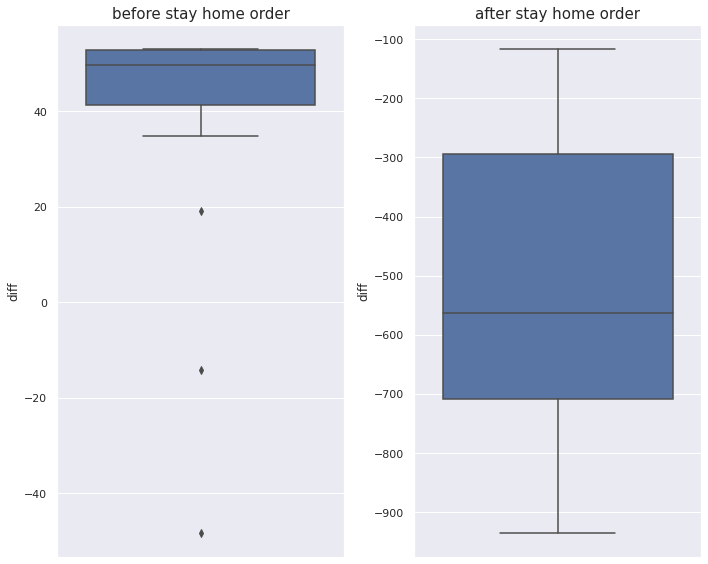

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='stay_home_order', data=df_stay_home[df_stay_home['date']<stay_home_order_start_day], ax=ax1)
sns.boxplot(y='diff', hue='stay_home_order', data=df_stay_home[df_stay_home['date']>stay_home_order_start_day], ax=ax2)
ax1.set_title('before stay home order', fontsize=15)
ax2.set_title('after stay home order', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_stay_home,after_stay_home)
print(fvalue, pvalue)

93.76460479670746 4.846329668110175e-12


**we can reject null hypothesis, hence means are significantly different. Results shows that the cases increased after stay home order, this should be due to the natural increase of cases during the first surge.**

**Considering 14 days period only**

In [ ]:
stay_home_order_start_day=pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d')
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=14)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-03-07
2020-04-04


In [ ]:
df_stay_home=df[(df['date']>=start)&(df['date']<=end)]
df_stay_home

,date,case,stay_home_order,7_day_moving_average
43,2020-03-07,0.666667,no,0.476190
44,2020-03-08,0.666667,no,0.523810
45,2020-03-09,1.666667,no,0.666667
46,2020-03-10,3.666667,no,1.142857
47,2020-03-11,5.000000,no,1.809524
48,2020-03-12,5.333333,no,2.523810
49,2020-03-13,7.666667,no,3.523810
50,2020-03-14,9.666667,no,4.809524
51,2020-03-15,16.333333,no,7.047619
52,2020-03-16,12.000000,no,8.523810


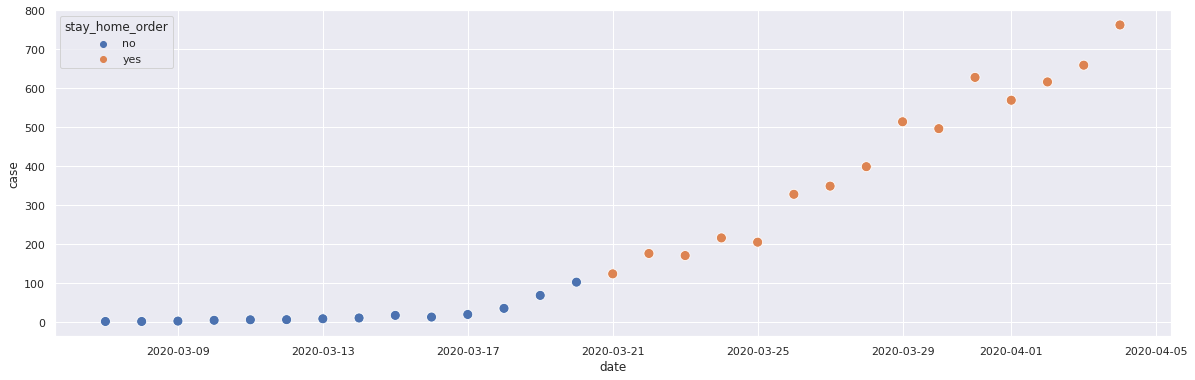

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_stay_home, hue='stay_home_order', s=100)

In [ ]:
#Differences
df_stay_home['diff']=df_stay_home[df_stay_home['date']==pd.to_datetime(df[df['stay_home_order']=='yes']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]-df_stay_home['case']
df_stay_home

,date,case,stay_home_order,7_day_moving_average,diff
43,2020-03-07,0.666667,no,0.476190,52.714286
44,2020-03-08,0.666667,no,0.523810,52.714286
45,2020-03-09,1.666667,no,0.666667,51.714286
46,2020-03-10,3.666667,no,1.142857,49.714286
47,2020-03-11,5.000000,no,1.809524,48.380952
48,2020-03-12,5.333333,no,2.523810,48.047619
49,2020-03-13,7.666667,no,3.523810,45.714286
50,2020-03-14,9.666667,no,4.809524,43.714286
51,2020-03-15,16.333333,no,7.047619,37.047619
52,2020-03-16,12.000000,no,8.523810,41.380952


In [ ]:
before_stay_home=df_stay_home[df_stay_home['date']<stay_home_order_start_day]['diff'].values
after_stay_home=df_stay_home[df_stay_home['date']>stay_home_order_start_day]['diff'].values
print('mean of the cases before and after stay at home order is: {} and {} respectively.'.format(np.mean(before_stay_home),np.mean(after_stay_home)))

mean of the cases before and after stay at home order is: 33.02380952380952 and -381.0952380952381 respectively.


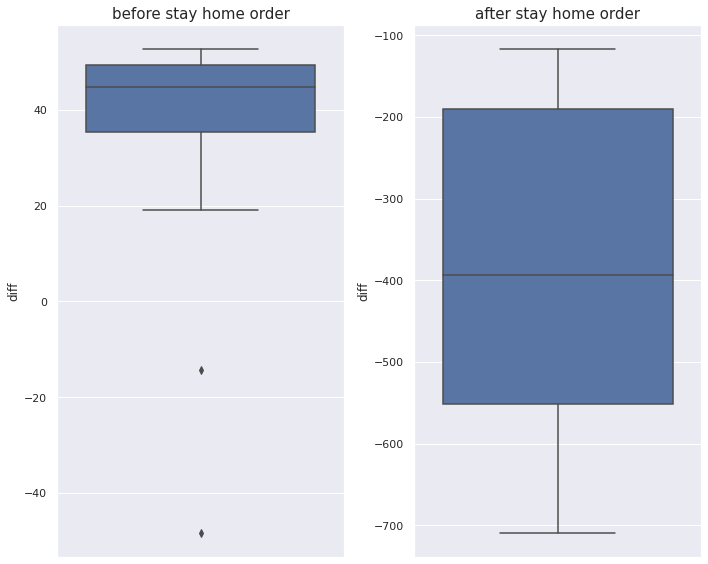

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='stay_home_order', data=df_stay_home[df_stay_home['date']<stay_home_order_start_day], ax=ax1)
sns.boxplot(y='diff', hue='stay_home_order', data=df_stay_home[df_stay_home['date']>stay_home_order_start_day], ax=ax2)
ax1.set_title('before stay home order', fontsize=15)
ax2.set_title('after stay home order', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_stay_home,after_stay_home)
print(fvalue, pvalue)

59.34970949651618 3.561491002693574e-08


**we can reject null hypothesis, hence means are significantly different. Results shows that the cases increased after stay home order, this should be due to the natural increase of cases during the first surge.**

#### BLM Protest

In [ ]:
df=df_averaged[['date','case','BLM_Protest']]
df['date']=pd.to_datetime(df['date'])
df['7_day_moving_average']=df['case'].rolling(7,min_periods=1).mean()
df

,date,case,BLM_Protest,7_day_moving_average
0,2020-01-24,1.000000,no,1.000000
1,2020-01-25,0.500000,no,0.750000
2,2020-01-26,0.333333,no,0.611111
3,2020-01-27,0.000000,no,0.458333
4,2020-01-28,0.000000,no,0.366667
...,...,...,...,...
383,2021-02-10,NaN,no,NaN
384,2021-02-11,NaN,no,NaN
385,2021-02-12,NaN,no,NaN
386,2021-02-13,NaN,no,NaN


In [ ]:
BLM_day=pd.to_datetime(df[df['BLM_Protest']=='yes']['date'].values[0]).strftime('%Y-%m-%d')
start=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['BLM_Protest']=='yes']['date'].values[0]).strftime('%Y-%m-%d'),"%Y-%m-%d") -timedelta(days=21)).strftime('%Y-%m-%d')
end=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['BLM_Protest']=='yes']['date'].values[2]).strftime('%Y-%m-%d'),"%Y-%m-%d") +timedelta(days=21)).strftime('%Y-%m-%d')
print(start)
print(end)

2020-05-08
2020-06-21


In [ ]:
df_BLM=df[(df['date']>=start)&(df['date']<=end)]
df_BLM

,date,case,BLM_Protest,7_day_moving_average
105,2020-05-08,1671.000000,no,1676.428571
106,2020-05-09,1661.666667,no,1659.190476
107,2020-05-10,1438.000000,no,1587.904762
108,2020-05-11,1048.333333,no,1497.333333
109,2020-05-12,1265.333333,no,1440.190476
110,2020-05-13,1250.333333,no,1410.952381
111,2020-05-14,1692.000000,no,1432.380952
112,2020-05-15,1478.333333,no,1404.857143
113,2020-05-16,1602.000000,no,1396.333333
114,2020-05-17,1253.666667,no,1370.000000


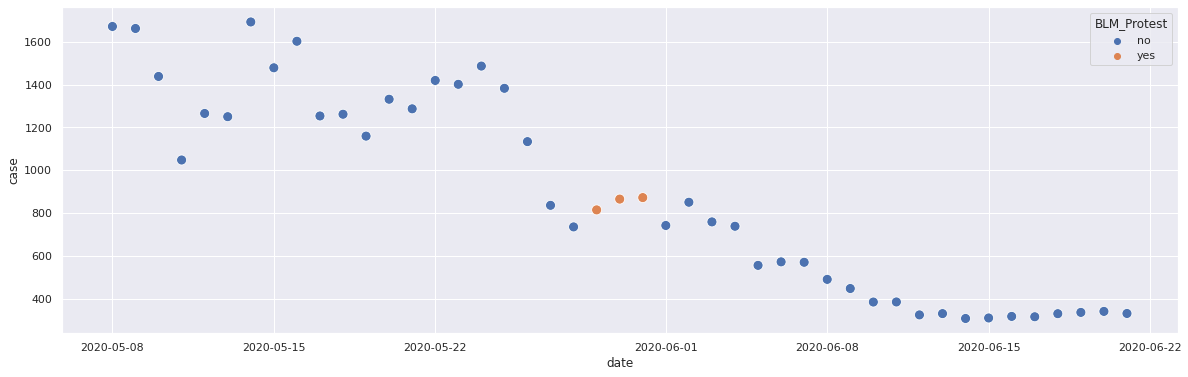

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='date',y='case', data=df_BLM, hue='BLM_Protest', s=100)

In [ ]:
#Differences
df_BLM['diff']=df_BLM['case']-df_BLM[df_BLM['date']==pd.to_datetime(df[df['BLM_Protest']=='yes']['date'].values[0]).strftime('%Y-%m-%d')]['7_day_moving_average'].values[0]
df_BLM

,date,case,BLM_Protest,7_day_moving_average,diff
105,2020-05-08,1671.000000,no,1676.428571,557.666667
106,2020-05-09,1661.666667,no,1659.190476,548.333333
107,2020-05-10,1438.000000,no,1587.904762,324.666667
108,2020-05-11,1048.333333,no,1497.333333,-65.000000
109,2020-05-12,1265.333333,no,1440.190476,152.000000
110,2020-05-13,1250.333333,no,1410.952381,137.000000
111,2020-05-14,1692.000000,no,1432.380952,578.666667
112,2020-05-15,1478.333333,no,1404.857143,365.000000
113,2020-05-16,1602.000000,no,1396.333333,488.666667
114,2020-05-17,1253.666667,no,1370.000000,140.333333


In [ ]:
BLM_day_2=pd.to_datetime(datetime.strptime(pd.to_datetime(df[df['BLM_Protest']=='yes']['date'].values[2]).strftime('%Y-%m-%d'),"%Y-%m-%d"))
BLM_day_2

Timestamp('2020-05-31 00:00:00')

In [ ]:
before_BLM=df_BLM[df_BLM['date']<BLM_day]['diff'].values
after_BLM=df_BLM[df_BLM['date']>BLM_day_2]['diff'].values
print ('mean of the cases before and after BLM protest are: {} and {} respectively.'. format(np.mean(before_BLM),np.mean(after_BLM)))

mean of the cases before and after BLM protest are: 210.36507936507894 and -648.2063492063496 respectively.


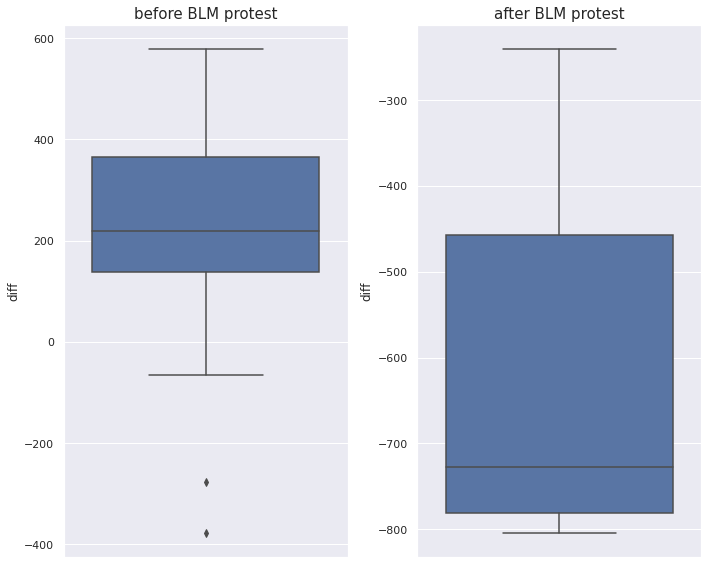

In [ ]:
fig, (ax1,ax2) =plt.subplots(nrows=1,ncols=2,figsize=(10,8))
sns.boxplot(y='diff', hue='BLM_Protest', data=df_BLM[df_BLM['date']<BLM_day], ax=ax1)
sns.boxplot(y='diff', hue='BLM_Protest', data=df_BLM[df_BLM['date']>BLM_day], ax=ax2)
ax1.set_title('before BLM protest', fontsize=15)
ax2.set_title('after BLM protest', fontsize=15)
fig.tight_layout()


In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(before_BLM,after_BLM)
print(fvalue, pvalue)

163.16148703584093 1.0658083981749935e-15


**we can reject null hypothesis, hence means are significantly different. Cases are decreased after BLM Protest, this should be due to the natural decrease in cases.**